# Regression

# Dataset : Life Expectancy (WHO)
## Variable Descriptions
Format: variable (type) - description

1. country (Nominal) - the country in which the indicators are from (i.e. United States of America or Congo)
2. year (Ordinal) - the calendar year the indicators are from (ranging from 2000 to 2015)
3. status (Nominal) - whether a country is considered to be 'Developing' or 'Developed' by WHO standards
4. life_expectancy (Ratio) - the life expectancy of people in years for a particular country and year
5. adult_mortality (Ratio) - the adult mortality rate per 1000 population (i.e. number of people dying between 15 and 60 years    per 1000 population); if the rate is 263 then that means 263 people will die out of 1000 between the ages of 15 and 60;        another way to think of this is that the chance an individual will die between 15 and 60 is 26.3%
6. infant_deaths (Ratio) - number of infant deaths per 1000 population; similar to above, but for infants
7. alcohol (Ratio) - a country's alcohol consumption rate measured as liters of pure alcohol consumption per capita
8. percentage_expenditure (Ratio) - expenditure on health as a percentage of Gross Domestic Product (gdp)
9. hepatitis_b (Ratio) - number of 1 year olds with Hepatitis B immunization over all 1 year olds in population
10. measles (Ratio) - number of reported Measles cases per 1000 population
11. bmi (Interval/Ordinal) - average Body Mass Index (BMI) of a country's total population
12. under-five_deaths (Ratio) - number of people under the age of five deaths per 1000 population
13. polio (Ratio) - number of 1 year olds with Polio immunization over the number of all 1 year olds in population
14. total_expenditure (Ratio) - government expenditure on health as a percentage of total government expenditure
15. diphtheria (Ratio) - Diphtheria tetanus toxoid and pertussis (DTP3) immunization rate of 1 year olds
16. hiv/aids (Ratio) - deaths per 1000 live births caused by HIV/AIDS for people under 5; number of people under 5 who die due     to HIV/AIDS per 1000 births
17. gdp (Ratio) - Gross Domestic Product per capita
18. population (Ratio) - population of a country
19. thinness_1-19_years (Ratio) - rate of thinness among people aged 10-19 (Note: variable should be renamed to thinness_10-       19_years to more accurately represent the variable)
20. thinness_5-9_years (Ratio) - rate of thinness among people aged 5-9
21. income_composition_of_resources (Ratio) - Human Development Index in terms of income composition of resources (index           ranging from 0 to 1)
22. schooling (Ratio) - average number of years of schooling of a population

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest,chi2
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from math import sqrt
import scipy.stats as stats
from scipy.stats.mstats import winsorize
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
import os
%matplotlib inline

In [2]:
df = pd.read_csv("C:/Users/sahit/Documents/Life Expectancy Data.csv")
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [3]:
df.shape

(2938, 22)

In [4]:
df.info()   # 2 categorical variables present

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
Country                            2938 non-null object
Year                               2938 non-null int64
Status                             2938 non-null object
Life expectancy                    2928 non-null float64
Adult Mortality                    2928 non-null float64
infant deaths                      2938 non-null int64
Alcohol                            2744 non-null float64
percentage expenditure             2938 non-null float64
Hepatitis B                        2385 non-null float64
Measles                            2938 non-null int64
 BMI                               2904 non-null float64
under-five deaths                  2938 non-null int64
Polio                              2919 non-null float64
Total expenditure                  2712 non-null float64
Diphtheria                         2919 non-null float64
 HIV/AIDS                          2938 non-null

In [5]:
# Renaming the column names properly
orig_cols = list(df.columns)
new_cols = []
for col in orig_cols:
    new_cols.append(col.strip().replace('  ', ' ').replace(' ', '_').lower())
df.columns = new_cols

In [6]:
df.head()

,country,year,status,life_expectancy,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles,...,polio,total_expenditure,diphtheria,hiv/aids,gdp,population,thinness_1-19_years,thinness_5-9_years,income_composition_of_resources,schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [7]:
df.describe()

,year,life_expectancy,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles,bmi,under-five_deaths,polio,total_expenditure,diphtheria,hiv/aids,gdp,population,thinness_1-19_years,thinness_5-9_years,income_composition_of_resources,schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


## Observations
1. Adult mortality of 1 does not make sense. We may need to change to null if under a certain threshold.
2. Infant deaths as low as 0 per 1000 also does not make sense, so it may be considered as null. Also, 1800 is likely an          outlier, but it is possible in a country with very high birthrates and perhaps a not very high population.
3. BMI of 1 and 87.3 is not proper measure because a BMI of 15 or lower is seriously underweight and a BMI of 40 or higher is      obese, therefore a large number of these measurements just seem unrealistic.
4. Under Five Deaths, is almost similar to infant deaths which will be better if considered as null.

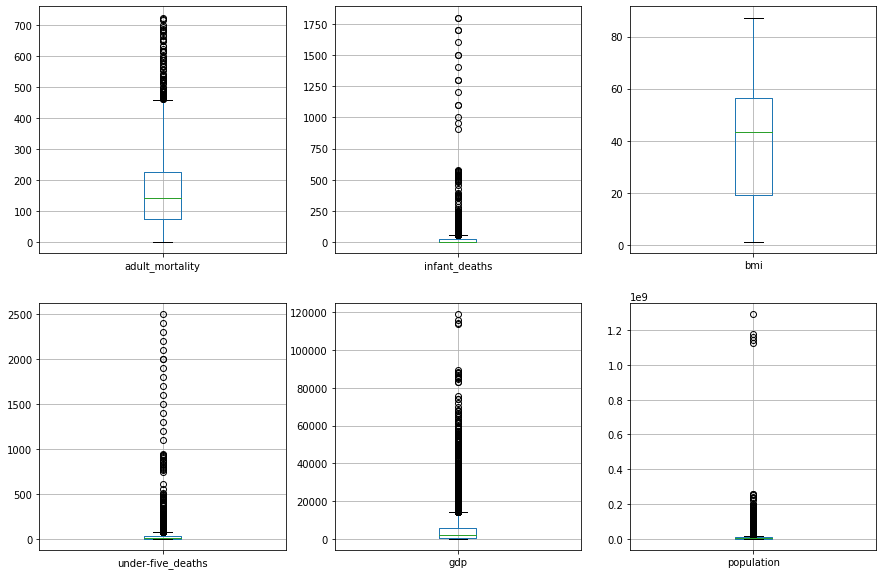

In [8]:
plt.figure(figsize=(15,10))
for i, col in enumerate(['adult_mortality', 'infant_deaths', 'bmi', 'under-five_deaths', 'gdp', 'population'], start=1):
    plt.subplot(2, 3, i)
    df.boxplot(col)

We can clearly observe that there are outliers here and some might be due to error in values.
So, we make the following as NULL as they don't make any sense.
1. Adult mortality rates lower than the 5th percentile
2. Infant deaths of 0
3. BMI less than 10 and greater than 50
4. Under Five deaths of 0

In [9]:
mort_5_percentile = np.percentile(df.adult_mortality.dropna(), 5)
df.adult_mortality = df.apply(lambda x: np.nan if x.adult_mortality < mort_5_percentile else x.adult_mortality, axis=1)
df.infant_deaths = df.infant_deaths.replace(0, np.nan)
df.bmi = df.apply(lambda x: np.nan if (x.bmi < 10 or x.bmi > 50) else x.bmi, axis=1)
df['under-five_deaths'] = df['under-five_deaths'].replace(0, np.nan)

In [10]:
df.isnull().sum()    # 14 columns have missing values

country                               0
year                                  0
status                                0
life_expectancy                      10
adult_mortality                     155
infant_deaths                       848
alcohol                             194
percentage_expenditure                0
hepatitis_b                         553
measles                               0
bmi                                1456
under-five_deaths                   785
polio                                19
total_expenditure                   226
diphtheria                           19
hiv/aids                              0
gdp                                 448
population                          652
thinness_1-19_years                  34
thinness_5-9_years                   34
income_composition_of_resources     167
schooling                           163
dtype: int64

We clearly observe that, almost half of the values are missing in column 'BMI' and hence we are dropping it.

In [11]:
df.drop(columns='bmi', inplace=True)

## Filling missing values
We are filling missing values using Median as it is not effected by outliers and we are grouping using 'year' column.

In [12]:
df_grouped=df.groupby(['year'])
df_imputed = df_grouped.transform(lambda grp: grp.fillna(grp.median()))
df[['life_expectancy','infant_deaths','under-five_deaths','adult_mortality','alcohol','hepatitis_b','polio','total_expenditure','diphtheria','gdp','population','thinness_1-19_years','thinness_5-9_years','income_composition_of_resources','schooling']] = df_imputed[['life_expectancy','infant_deaths','under-five_deaths','adult_mortality','alcohol','hepatitis_b','polio','total_expenditure','diphtheria','gdp','population','thinness_1-19_years','thinness_5-9_years','income_composition_of_resources','schooling']]

In [13]:
df.isnull().sum()    # no missing values now

country                            0
year                               0
status                             0
life_expectancy                    0
adult_mortality                    0
infant_deaths                      0
alcohol                            0
percentage_expenditure             0
hepatitis_b                        0
measles                            0
under-five_deaths                  0
polio                              0
total_expenditure                  0
diphtheria                         0
hiv/aids                           0
gdp                                0
population                         0
thinness_1-19_years                0
thinness_5-9_years                 0
income_composition_of_resources    0
schooling                          0
dtype: int64

## Outlier detection
We can identify outliers using boxplots/histograms. Here is the plot to identify outliers.

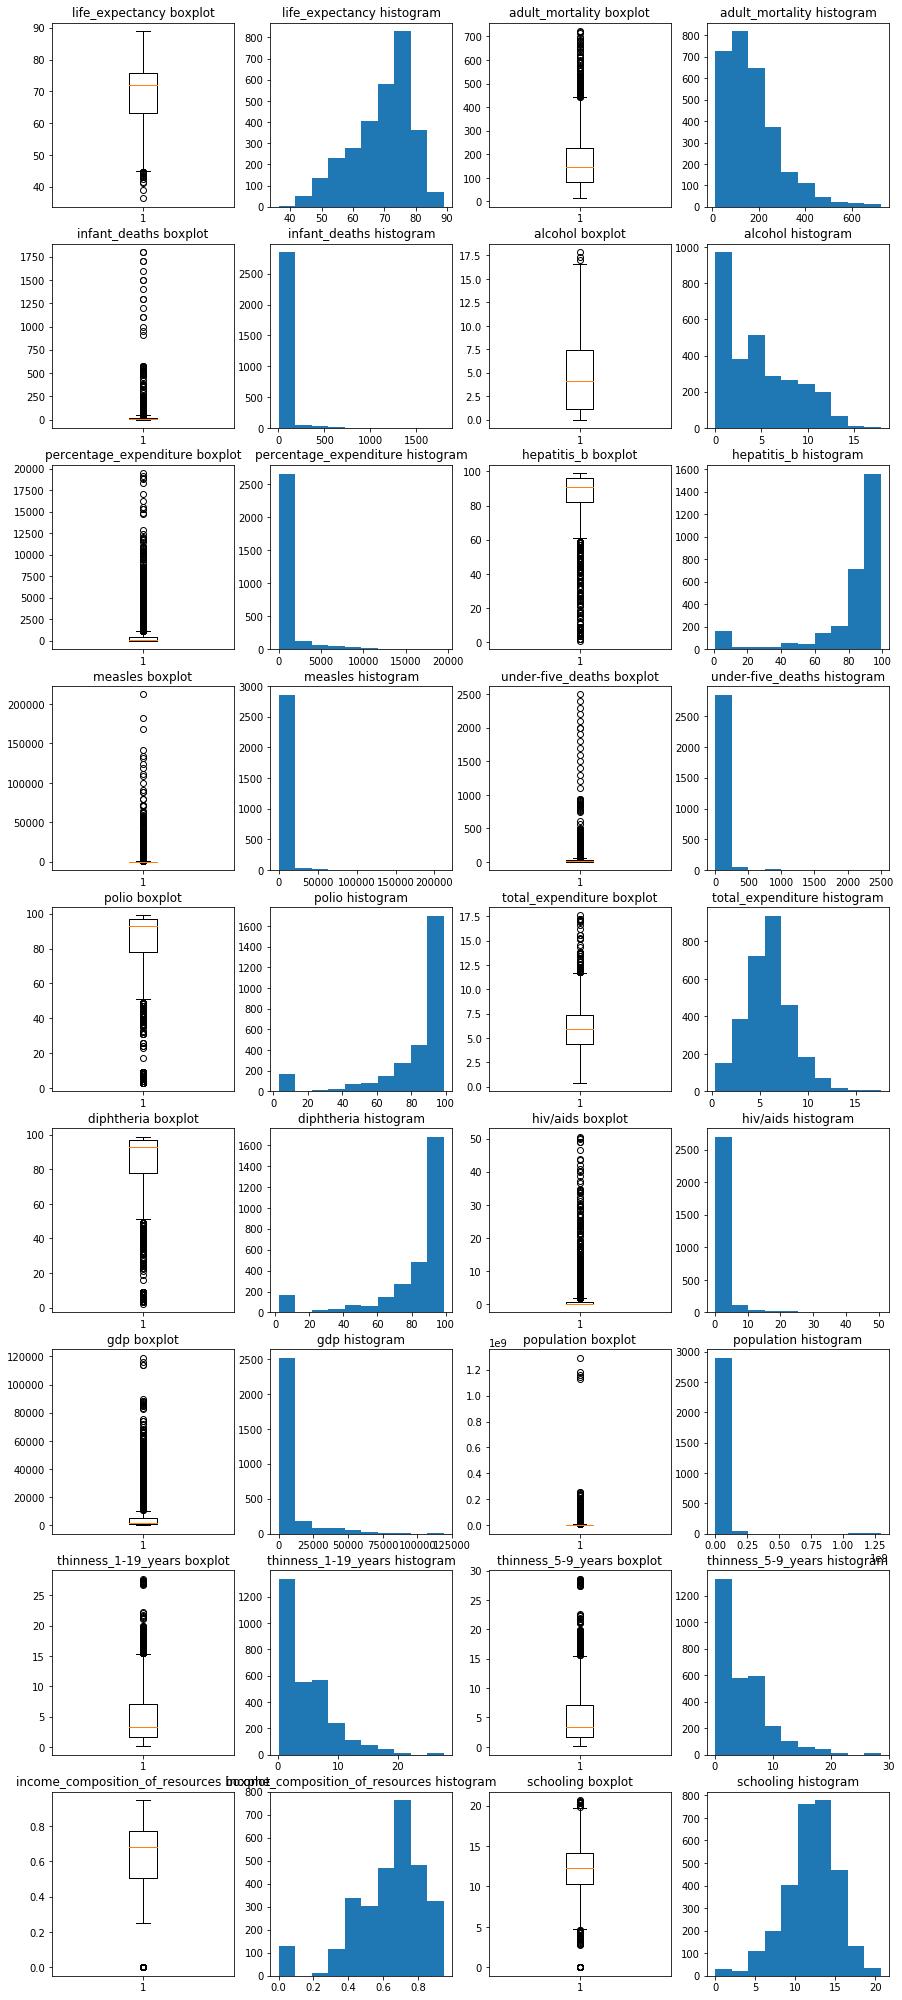

In [14]:
cont_vars = list(df.columns)[3:]
def outliers_visual(data):
    plt.figure(figsize=(15, 40))
    i = 0
    for col in cont_vars:
        i += 1
        plt.subplot(10, 4, i)
        plt.boxplot(data[col])
        plt.title('{} boxplot'.format(col))
        i += 1
        plt.subplot(10, 4, i)
        plt.hist(data[col])
        plt.title('{} histogram'.format(col))
    plt.show()
outliers_visual(df)

We can observe that almost all the variables have outliers including the target variable life_expectancy.

## Winsorizing the data
There are many ways to deal with outliers. Winsorizing method is the effective way. It limits both the upper and lower bounds and helps to eliminate the outliers.

In [15]:
def test_wins(col, lower_limit=0, upper_limit=0, show_plot=True):
    wins_data = winsorize(df[col], limits=(lower_limit, upper_limit))
    wins_dict[col] = wins_data
    if show_plot == True:
        plt.figure(figsize=(15,5))
        plt.subplot(121)
        plt.boxplot(df[col])
        plt.title('original {}'.format(col))
        plt.subplot(122)
        plt.boxplot(wins_data)
        plt.title('wins=({},{}) {}'.format(lower_limit, upper_limit, col))
        plt.show()

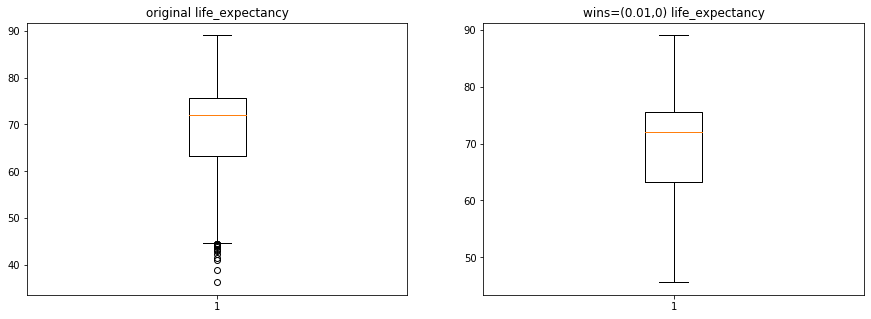

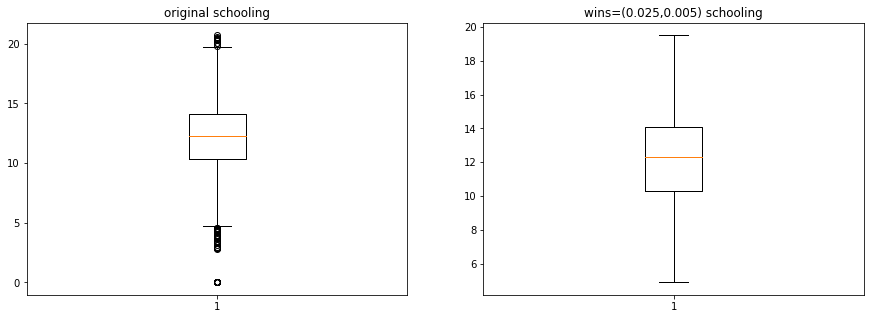

In [16]:
wins_dict = {}
test_wins(cont_vars[0], lower_limit=.01, show_plot=True)
test_wins(cont_vars[1], upper_limit=.04, show_plot=False)
test_wins(cont_vars[2], upper_limit=.05, show_plot=False)
test_wins(cont_vars[3], upper_limit=.0025, show_plot=False)
test_wins(cont_vars[4], upper_limit=.135, show_plot=False)
test_wins(cont_vars[5], lower_limit=.1, show_plot=False)
test_wins(cont_vars[6], upper_limit=.19, show_plot=False)
test_wins(cont_vars[7], upper_limit=.05, show_plot=False)
test_wins(cont_vars[8], lower_limit=.1, show_plot=False)
test_wins(cont_vars[9], upper_limit=.02, show_plot=False)
test_wins(cont_vars[10], lower_limit=.105, show_plot=False)
test_wins(cont_vars[11], upper_limit=.185, show_plot=False)
test_wins(cont_vars[12], upper_limit=.105, show_plot=False)
test_wins(cont_vars[13], upper_limit=.07, show_plot=False)
test_wins(cont_vars[14], upper_limit=.035, show_plot=False)
test_wins(cont_vars[15], upper_limit=.035, show_plot=False)
test_wins(cont_vars[16], lower_limit=.05, show_plot=False)
test_wins(cont_vars[17], lower_limit=.025, upper_limit=.005, show_plot=True)

We can clearly observe that outliers are taken care of.

In [17]:
wins_df = df.iloc[:, 0:3]
for col in cont_vars:
    wins_df[col] = wins_dict[col]

In [18]:
wins_df.describe()

,year,life_expectancy,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles,under-five_deaths,polio,total_expenditure,diphtheria,hiv/aids,gdp,population,thinness_1-19_years,thinness_5-9_years,income_composition_of_resources,schooling
count,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2.938000e+03,2938.000000,2938.000000,2938.000000,2938.000000
mean,2007.518720,69.255480,168.035398,19.107897,4.634255,281.501093,85.993193,220.691287,26.419503,85.583220,5.969438,85.538972,0.526991,4209.432129,4.994901e+06,4.686249,4.703131,0.643499,12.069980
std,4.613841,9.464232,107.712459,24.884618,3.911492,384.161450,13.613617,329.192321,37.059444,15.270949,2.302385,15.213007,0.675962,5342.292920,8.192506e+06,3.928300,3.966861,0.171606,3.084312
min,2000.000000,45.600000,13.000000,1.000000,0.010000,0.000000,55.000000,0.000000,1.000000,52.000000,0.370000,52.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.291000,4.900000
25%,2004.000000,63.200000,84.000000,4.000000,1.082500,4.685343,82.000000,0.000000,4.000000,78.000000,4.370000,78.000000,0.100000,580.486996,4.189172e+05,1.600000,1.600000,0.504250,10.300000
50%,2008.000000,72.100000,148.000000,9.000000,4.100000,64.912906,91.000000,17.000000,11.000000,93.000000,5.895000,93.000000,0.100000,1791.067713,1.412669e+06,3.300000,3.300000,0.681000,12.300000
75%,2012.000000,75.600000,227.000000,22.000000,7.390000,441.534144,96.000000,360.250000,28.000000,97.000000,7.330000,97.000000,0.800000,4779.405190,4.584371e+06,7.100000,7.200000,0.772000,14.100000
max,2015.000000,89.000000,428.000000,95.000000,15.140000,1077.712092,99.000000,831.000000,138.000000,99.000000,11.660000,99.000000,1.800000,16784.346160,2.865628e+07,15.300000,15.500000,0.948000,19.500000


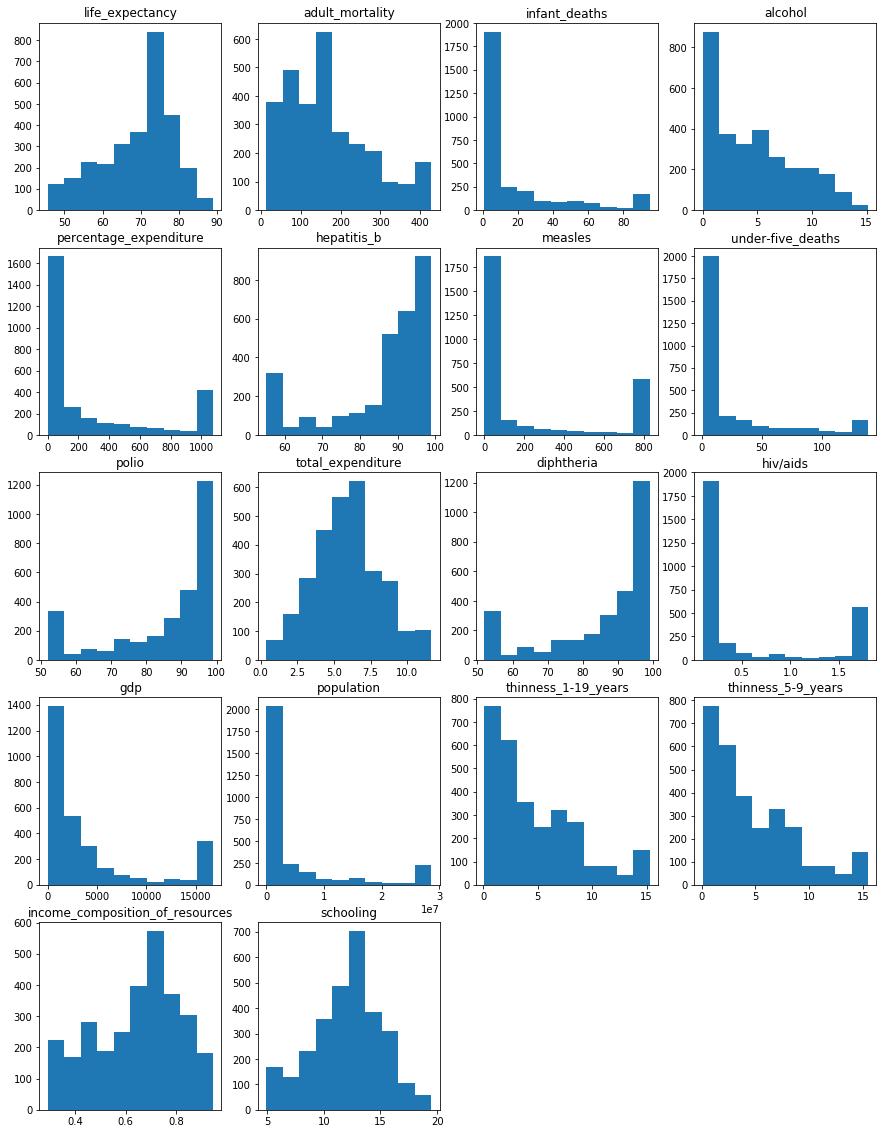

In [19]:
plt.figure(figsize=(15, 20))
for i, col in enumerate(cont_vars, 1):
    plt.subplot(5, 4, i)
    plt.hist(wins_df[col])
    plt.title(col)

In [20]:
corr=wins_df.corr()
corr

,year,life_expectancy,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles,under-five_deaths,polio,total_expenditure,diphtheria,hiv/aids,gdp,population,thinness_1-19_years,thinness_5-9_years,income_composition_of_resources,schooling
year,1.000000,0.170598,-0.073503,-0.057020,-0.032028,0.032807,0.061793,-0.118772,-0.064063,0.114177,0.131369,0.146067,-0.088913,0.129550,0.042027,-0.049298,-0.049761,0.220595,0.207540
life_expectancy,0.170598,1.000000,-0.683149,-0.471316,0.396375,0.488057,0.256027,-0.338286,-0.513382,0.569008,0.223701,0.574722,-0.797209,0.516672,-0.051757,-0.510033,-0.507747,0.788569,0.740172
adult_mortality,-0.073503,-0.683149,1.000000,0.301307,-0.192823,-0.299900,-0.187836,0.217199,0.327385,-0.347820,-0.124577,-0.350226,0.600625,-0.324966,0.044500,0.331915,0.338519,-0.510808,-0.453791
infant_deaths,-0.057020,-0.471316,0.301307,1.000000,-0.247301,-0.282521,-0.269886,0.556259,0.991759,-0.382287,-0.163535,-0.380607,0.329853,-0.274033,0.341229,0.377133,0.385934,-0.376913,-0.414849
alcohol,-0.032028,0.396375,-0.192823,-0.247301,1.000000,0.378865,0.131055,-0.197054,-0.259552,0.264449,0.309607,0.271709,-0.195861,0.390818,-0.012642,-0.433828,-0.424274,0.483327,0.525593
percentage_expenditure,0.032807,0.488057,-0.299900,-0.282521,0.378865,1.000000,0.127302,-0.194687,-0.293390,0.266075,0.160696,0.266158,-0.295791,0.834909,-0.010651,-0.328805,-0.330848,0.544095,0.525878
hepatitis_b,0.061793,0.256027,-0.187836,-0.269886,0.131055,0.127302,1.000000,-0.225590,-0.277412,0.526110,0.078257,0.560089,-0.205799,0.158038,-0.136324,-0.118446,-0.124603,0.242746,0.237627
measles,-0.118772,-0.338286,0.217199,0.556259,-0.197054,-0.194687,-0.225590,1.000000,0.566628,-0.323113,-0.161968,-0.318319,0.226305,-0.187704,0.273993,0.357068,0.361622,-0.268950,-0.326491
under-five_deaths,-0.064063,-0.513382,0.327385,0.991759,-0.259552,-0.293390,-0.277412,0.566628,1.000000,-0.415019,-0.165664,-0.413933,0.377422,-0.287296,0.330322,0.390586,0.394628,-0.413818,-0.451640
polio,0.114177,0.569008,-0.347820,-0.382287,0.264449,0.266075,0.526110,-0.323113,-0.415019,1.000000,0.165539,0.855806,-0.472223,0.302390,-0.080971,-0.286599,-0.285091,0.505265,0.499949


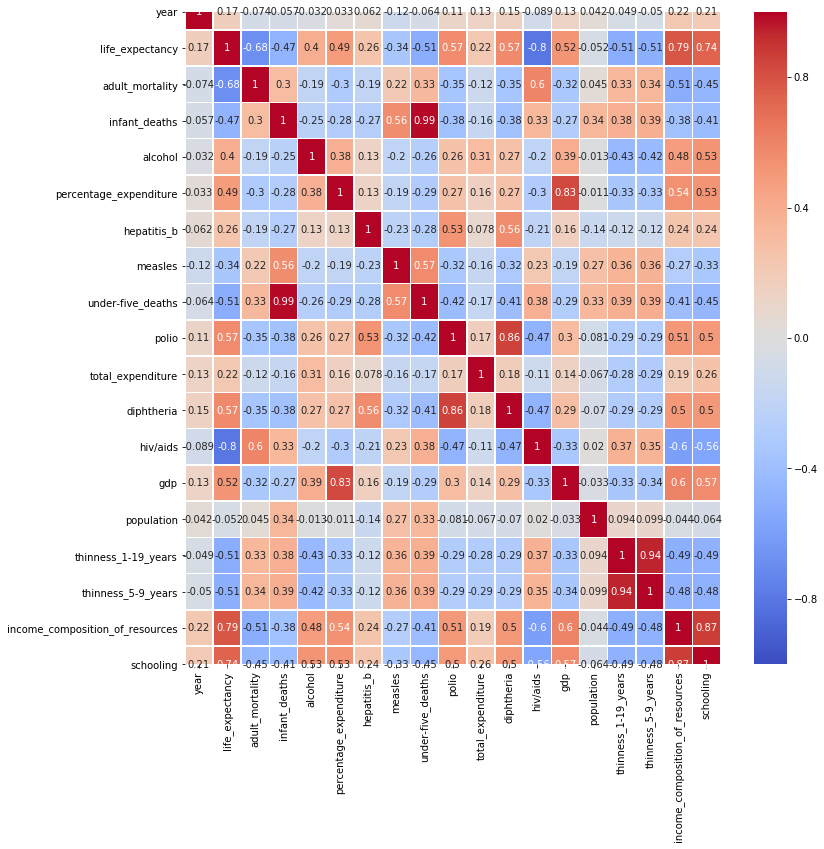

In [21]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(12,12))       
sns.heatmap(corr,xticklabels=corr.columns,
        yticklabels=corr.columns, annot=True, linewidths=.5, ax=ax,fmt='.2g', vmin=-1, vmax=1, center=0, cmap='coolwarm')

1. It is observed that Life Expectancy (target variable) appears to be highly positively correlated with
   Income Composition of Resources and Schooling.
2. Life Expectancy is highly negatively correlated with Adult Mortality and HIV/AIDS.
3. Life Expectancy is extremely lowly correlated to population.       
4. Infant deaths and Under Five deaths are extremely highly correlated
5. Percentage Expenditure and GDP are relatively highly correlated
6. Hepatitis B vaccine rate is positively correlated with Diphtheria
7. Polio vaccine rate and Diphtheria are positively correlated
8. Thinness of 5-9 Year olds rate and Thinness of 10-15 Year olds rate is extremely highly correlated
9. Income Composition of Resources and Schooling are very highly correlated

## Converting categorical variables to numerical using one-hot vector encoding

In [22]:
# One hot encoding on neighbourhood_group column
dummy1 =pd.get_dummies(wins_df['country'],columns='country',prefix='country')
dummy1

,country_Afghanistan,country_Albania,country_Algeria,country_Angola,country_Antigua and Barbuda,country_Argentina,country_Armenia,country_Australia,country_Austria,country_Azerbaijan,...,country_United Republic of Tanzania,country_United States of America,country_Uruguay,country_Uzbekistan,country_Vanuatu,country_Venezuela (Bolivarian Republic of),country_Viet Nam,country_Yemen,country_Zambia,country_Zimbabwe
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2934,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2935,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2936,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [23]:
wins_df=pd.concat([wins_df, dummy1], axis=1)
wins_df.drop(['country'],axis=1,inplace= True)
wins_df.head()

,year,status,life_expectancy,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles,under-five_deaths,...,country_United Republic of Tanzania,country_United States of America,country_Uruguay,country_Uzbekistan,country_Vanuatu,country_Venezuela (Bolivarian Republic of),country_Viet Nam,country_Yemen,country_Zambia,country_Zimbabwe
0,2015,Developing,65.0,263.0,62.0,0.01,71.279624,65.0,831,83.0,...,0,0,0,0,0,0,0,0,0,0
1,2014,Developing,59.9,271.0,64.0,0.01,73.523582,62.0,492,86.0,...,0,0,0,0,0,0,0,0,0,0
2,2013,Developing,59.9,268.0,66.0,0.01,73.219243,64.0,430,89.0,...,0,0,0,0,0,0,0,0,0,0
3,2012,Developing,59.5,272.0,69.0,0.01,78.184215,67.0,831,93.0,...,0,0,0,0,0,0,0,0,0,0
4,2011,Developing,59.2,275.0,71.0,0.01,7.097109,68.0,831,97.0,...,0,0,0,0,0,0,0,0,0,0


In [24]:
wins_df['status']=wins_df['status'].map({ 'Developing':0, 'Developed':1}).astype(int)

In [25]:
wins_df.head()

,year,status,life_expectancy,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles,under-five_deaths,...,country_United Republic of Tanzania,country_United States of America,country_Uruguay,country_Uzbekistan,country_Vanuatu,country_Venezuela (Bolivarian Republic of),country_Viet Nam,country_Yemen,country_Zambia,country_Zimbabwe
0,2015,0,65.0,263.0,62.0,0.01,71.279624,65.0,831,83.0,...,0,0,0,0,0,0,0,0,0,0
1,2014,0,59.9,271.0,64.0,0.01,73.523582,62.0,492,86.0,...,0,0,0,0,0,0,0,0,0,0
2,2013,0,59.9,268.0,66.0,0.01,73.219243,64.0,430,89.0,...,0,0,0,0,0,0,0,0,0,0
3,2012,0,59.5,272.0,69.0,0.01,78.184215,67.0,831,93.0,...,0,0,0,0,0,0,0,0,0,0
4,2011,0,59.2,275.0,71.0,0.01,7.097109,68.0,831,97.0,...,0,0,0,0,0,0,0,0,0,0


In [26]:
X1 = wins_df.loc[:, wins_df.columns != 'life_expectancy']   #all columns except the life_expectancy
X1

,year,status,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles,under-five_deaths,polio,...,country_United Republic of Tanzania,country_United States of America,country_Uruguay,country_Uzbekistan,country_Vanuatu,country_Venezuela (Bolivarian Republic of),country_Viet Nam,country_Yemen,country_Zambia,country_Zimbabwe
0,2015,0,263.0,62.0,0.01,71.279624,65.0,831,83.0,52.0,...,0,0,0,0,0,0,0,0,0,0
1,2014,0,271.0,64.0,0.01,73.523582,62.0,492,86.0,58.0,...,0,0,0,0,0,0,0,0,0,0
2,2013,0,268.0,66.0,0.01,73.219243,64.0,430,89.0,62.0,...,0,0,0,0,0,0,0,0,0,0
3,2012,0,272.0,69.0,0.01,78.184215,67.0,831,93.0,67.0,...,0,0,0,0,0,0,0,0,0,0
4,2011,0,275.0,71.0,0.01,7.097109,68.0,831,97.0,68.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,2004,0,428.0,27.0,4.36,0.000000,68.0,31,42.0,67.0,...,0,0,0,0,0,0,0,0,0,1
2934,2003,0,428.0,26.0,4.06,0.000000,55.0,831,41.0,52.0,...,0,0,0,0,0,0,0,0,0,1
2935,2002,0,73.0,25.0,4.43,0.000000,73.0,304,40.0,73.0,...,0,0,0,0,0,0,0,0,0,1
2936,2001,0,428.0,25.0,1.72,0.000000,76.0,529,39.0,76.0,...,0,0,0,0,0,0,0,0,0,1


In [27]:
y1 = wins_df.iloc[:, wins_df.columns == 'life_expectancy']  #only the life_expectancy column
y1

,life_expectancy
0,65.0
1,59.9
2,59.9
3,59.5
4,59.2
...,...
2933,45.6
2934,45.6
2935,45.6
2936,45.6


# Splitting data

In [28]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import datasets, linear_model

In [29]:
X_train_org1, X_test_org1, y_train1, y_test1 = train_test_split(X1, y1, random_state = 0,test_size = 0.3)
print(X_train_org1.shape, y_train1.shape)
print (X_test_org1.shape, y_test1.shape)


scaler = MinMaxScaler()
X_train1 = scaler.fit_transform(X_train_org1)
X_test1 = scaler.transform(X_test_org1)

(2056, 212) (2056, 1)
(882, 212) (882, 1)


We are using MinMaxScaler since the skewness is still observed in the histogram plots.

In [30]:
X_train1

array([[0.26666667, 0.        , 0.50843373, ..., 0.        , 0.        ,
        0.        ],
       [0.86666667, 0.        , 0.4313253 , ..., 0.        , 0.        ,
        0.        ],
       [0.93333333, 0.        , 0.31204819, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.86666667, 0.        , 0.03614458, ..., 0.        , 0.        ,
        0.        ],
       [0.6       , 0.        , 0.36626506, ..., 0.        , 0.        ,
        0.        ],
       [0.86666667, 0.        , 0.44578313, ..., 0.        , 0.        ,
        0.        ]])

In [31]:
y_train1=np.ravel(y_train1, order = 'C')
y_train1

array([64. , 67.1, 77.5, ..., 62.7, 66.6, 71. ])

## Bagging

## SVM using RBF kernel

In [32]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import BaggingRegressor

brsvm = SVR(kernel='rbf',C=100,gamma=0.1)
brsvm_bc_parameters = {'max_samples': [100, 150, 200, 250, 300],
                  'n_estimators': [40, 50, 70, 100, 250, 500]}
                  
brsvm_bc = BaggingRegressor(brsvm, bootstrap=True, n_jobs=-1, random_state=0)
brsvm_grid = GridSearchCV(brsvm_bc, brsvm_bc_parameters,cv=10)
brsvm_grid.fit(X_train1, y_train1)

GridSearchCV(cv=10, error_score=nan,
             estimator=BaggingRegressor(base_estimator=SVR(C=100,
                                                           cache_size=200,
                                                           coef0=0.0, degree=3,
                                                           epsilon=0.1,
                                                           gamma=0.1,
                                                           kernel='rbf',
                                                           max_iter=-1,
                                                           shrinking=True,
                                                           tol=0.001,
                                                           verbose=False),
                                        bootstrap=True,
                                        bootstrap_features=False,
                                        max_features=1.0, max_samples=1.0,
                                      

In [33]:
brsvm_grid.best_estimator_

BaggingRegressor(base_estimator=SVR(C=100, cache_size=200, coef0=0.0, degree=3,
                                    epsilon=0.1, gamma=0.1, kernel='rbf',
                                    max_iter=-1, shrinking=True, tol=0.001,
                                    verbose=False),
                 bootstrap=True, bootstrap_features=False, max_features=1.0,
                 max_samples=300, n_estimators=100, n_jobs=-1, oob_score=False,
                 random_state=0, verbose=0, warm_start=False)

In [34]:
brsvm_grid.best_score_

0.9383860965066461

In [35]:
brsvm_grid.best_params_

{'max_samples': 300, 'n_estimators': 100}

In [36]:
brsvm_grid.n_splits_

10

## Using best parameters for bagging on RBF kernel SVM

In [37]:
brsvm_test = SVR(kernel='rbf',C=100,gamma=0.1)
brsvm_bctest = BaggingRegressor(brsvm_test,max_samples= 300, n_estimators= 100 ,bootstrap=True, n_jobs=-1, random_state=0)
brsvm_bctest.fit(X_train1,y_train1)
brsvm_predict=brsvm_bctest.predict(X_test1)
error_brsvm = pd.DataFrame({
        'Actual Values': np.array(y_test1).flatten(),
        'Predicted Values': brsvm_predict.flatten()})
error_brsvm.head()

,Actual Values,Predicted Values
0,77.3,77.325922
1,66.6,66.191572
2,52.6,55.343122
3,61.5,60.672844
4,60.0,57.312964


In [38]:
mae_brsvm=mean_absolute_error(y_test1,brsvm_predict)
mse_brsvm=mean_squared_error(y_test1,brsvm_predict)
rmse_brsvm=sqrt(mean_squared_error(y_test1,brsvm_predict))

print('MAE: {:.4f}'.format(mae_brsvm))
print('MSE: {:.4f}'.format(mse_brsvm))
print('RMSE: {:.4f}'.format(rmse_brsvm))

MAE: 1.6210
MSE: 5.6215
RMSE: 2.3710


In [39]:
print('Train score: {:.4f}'.format(brsvm_bctest.score(X_train1, y_train1)))
print('Test score: {:.4f}'.format(brsvm_bctest.score(X_test1, y_test1)))

Train score: 0.9520
Test score: 0.9362


In [40]:
from sklearn.metrics import r2_score

r2_score(y_test1,brsvm_predict)

0.9362201789264318

## KNN Regressor

In [41]:
from sklearn.neighbors import KNeighborsRegressor

knn= KNeighborsRegressor(3)  
knn_br_parameters = {'max_samples': [150, 200, 250, 300],
                  'n_estimators': [70, 100, 250, 500]}
                  
knn_br = BaggingRegressor(knn, bootstrap=True, n_jobs=-1, random_state=0)
knnbr_grid = GridSearchCV(knn_br, knn_br_parameters,cv=10)
knnbr_grid.fit(X_train1, y_train1)

C:\Anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
C:\Anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


GridSearchCV(cv=10, error_score=nan,
             estimator=BaggingRegressor(base_estimator=KNeighborsRegressor(algorithm='auto',
                                                                           leaf_size=30,
                                                                           metric='minkowski',
                                                                           metric_params=None,
                                                                           n_jobs=None,
                                                                           n_neighbors=3,
                                                                           p=2,
                                                                           weights='uniform'),
                                        bootstrap=True,
                                        bootstrap_features=False,
                                        max_features=1.0, max_samples=1.0,
                                        n

In [42]:
knnbr_grid.best_estimator_

BaggingRegressor(base_estimator=KNeighborsRegressor(algorithm='auto',
                                                    leaf_size=30,
                                                    metric='minkowski',
                                                    metric_params=None,
                                                    n_jobs=None, n_neighbors=3,
                                                    p=2, weights='uniform'),
                 bootstrap=True, bootstrap_features=False, max_features=1.0,
                 max_samples=300, n_estimators=500, n_jobs=-1, oob_score=False,
                 random_state=0, verbose=0, warm_start=False)

In [43]:
knnbr_grid.best_score_

0.9165129132585708

In [44]:
knnbr_grid.best_params_

{'max_samples': 300, 'n_estimators': 500}

In [45]:
knnbr_grid.n_splits_

10

## Using best parameters for bagging on KNN Regressor

In [46]:
knn_test= KNeighborsRegressor(3)
knn_brtest = BaggingRegressor(knn_test,max_samples= 300, n_estimators= 500 ,bootstrap=True, n_jobs=-1, random_state=0)
knn_brtest.fit(X_train1,y_train1)
bknn_predict=knn_brtest.predict(X_test1)
error_bknn = pd.DataFrame({
        'Actual Values': np.array(y_test1).flatten(),
        'Predicted Values': bknn_predict.flatten()})
error_bknn.head()

,Actual Values,Predicted Values
0,77.3,76.889267
1,66.6,66.059733
2,52.6,57.138467
3,61.5,57.493000
4,60.0,55.545267


In [47]:
mae_bknn=mean_absolute_error(y_test1,bknn_predict)
mse_bknn=mean_squared_error(y_test1,bknn_predict)
rmse_bknn=sqrt(mean_squared_error(y_test1,bknn_predict))

print('MAE: {:.4f}'.format(mae_bknn))
print('MSE: {:.4f}'.format(mse_bknn))
print('RMSE: {:.4f}'.format(rmse_bknn))

MAE: 2.0364
MSE: 7.9914
RMSE: 2.8269


In [48]:
print('Train score: {:.4f}'.format(knn_brtest.score(X_train1, y_train1)))
print('Test score: {:.4f}'.format(knn_brtest.score(X_test1, y_test1)))

Train score: 0.9267
Test score: 0.9093


In [49]:
r2_score(y_test1,bknn_predict)

0.9093316097307625

## Pasting

### KNN Regressor

In [50]:
from sklearn.neighbors import KNeighborsRegressor

pknn= KNeighborsRegressor(3)  
knn_p_parameters = {'max_samples': [150, 200, 250, 300],
                  'n_estimators': [70, 100, 250, 500]}
                  
knn_p = BaggingRegressor(pknn, bootstrap=False, n_jobs=-1, random_state=0)
knnp_grid = GridSearchCV(knn_p, knn_p_parameters,cv=10)
knnp_grid.fit(X_train1, y_train1)

C:\Anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


GridSearchCV(cv=10, error_score=nan,
             estimator=BaggingRegressor(base_estimator=KNeighborsRegressor(algorithm='auto',
                                                                           leaf_size=30,
                                                                           metric='minkowski',
                                                                           metric_params=None,
                                                                           n_jobs=None,
                                                                           n_neighbors=3,
                                                                           p=2,
                                                                           weights='uniform'),
                                        bootstrap=False,
                                        bootstrap_features=False,
                                        max_features=1.0, max_samples=1.0,
                                        

In [51]:
knnp_grid.best_estimator_

BaggingRegressor(base_estimator=KNeighborsRegressor(algorithm='auto',
                                                    leaf_size=30,
                                                    metric='minkowski',
                                                    metric_params=None,
                                                    n_jobs=None, n_neighbors=3,
                                                    p=2, weights='uniform'),
                 bootstrap=False, bootstrap_features=False, max_features=1.0,
                 max_samples=300, n_estimators=500, n_jobs=-1, oob_score=False,
                 random_state=0, verbose=0, warm_start=False)

In [52]:
knnp_grid.best_score_

0.9175231760375226

In [53]:
knnp_grid.best_params_

{'max_samples': 300, 'n_estimators': 500}

In [54]:
knnp_grid.n_splits_

10

## Using best parameters for pasting on KNN Regressor

In [55]:
pknn_test= KNeighborsRegressor(3)
knn_ptest = BaggingRegressor(pknn_test,max_samples= 300, n_estimators= 500 ,bootstrap=False, n_jobs=-1, random_state=0)
knn_ptest.fit(X_train1,y_train1)
pknn_predict=knn_ptest.predict(X_test1)
error_pknn = pd.DataFrame({
        'Actual Values': np.array(y_test1).flatten(),
        'Predicted Values': pknn_predict.flatten()})
error_pknn.head()

,Actual Values,Predicted Values
0,77.3,76.796600
1,66.6,66.345467
2,52.6,57.060067
3,61.5,57.468467
4,60.0,55.307067


In [56]:
mae_pknn=mean_absolute_error(y_test1,pknn_predict)
mse_pknn=mean_squared_error(y_test1,pknn_predict)
rmse_pknn=sqrt(mean_squared_error(y_test1,pknn_predict))

print('MAE: {:.4f}'.format(mae_pknn))
print('MSE: {:.4f}'.format(mse_pknn))
print('RMSE: {:.4f}'.format(rmse_pknn))

MAE: 2.0300
MSE: 7.9321
RMSE: 2.8164


In [57]:
print('Train score: {:.4f}'.format(knn_ptest.score(X_train1, y_train1)))
print('Test score: {:.4f}'.format(knn_ptest.score(X_test1, y_test1)))

Train score: 0.9275
Test score: 0.9100


In [58]:
r2_score(y_test1,pknn_predict)

0.9100043582182055

## RBF kernel SVM

In [59]:
prsvm = SVR(kernel='rbf',C=100,gamma=0.1)
prsvm_p_parameters = {'max_samples': [100, 150, 200, 250, 300],
                  'n_estimators': [50, 100, 250, 500]}
                  
prsvm_p = BaggingRegressor(prsvm, bootstrap=False, n_jobs=-1, random_state=0)
prsvmp_grid = GridSearchCV(prsvm_p, prsvm_p_parameters,cv=10)
prsvmp_grid.fit(X_train1, y_train1)

GridSearchCV(cv=10, error_score=nan,
             estimator=BaggingRegressor(base_estimator=SVR(C=100,
                                                           cache_size=200,
                                                           coef0=0.0, degree=3,
                                                           epsilon=0.1,
                                                           gamma=0.1,
                                                           kernel='rbf',
                                                           max_iter=-1,
                                                           shrinking=True,
                                                           tol=0.001,
                                                           verbose=False),
                                        bootstrap=False,
                                        bootstrap_features=False,
                                        max_features=1.0, max_samples=1.0,
                                     

In [60]:
prsvmp_grid.best_estimator_

BaggingRegressor(base_estimator=SVR(C=100, cache_size=200, coef0=0.0, degree=3,
                                    epsilon=0.1, gamma=0.1, kernel='rbf',
                                    max_iter=-1, shrinking=True, tol=0.001,
                                    verbose=False),
                 bootstrap=False, bootstrap_features=False, max_features=1.0,
                 max_samples=300, n_estimators=250, n_jobs=-1, oob_score=False,
                 random_state=0, verbose=0, warm_start=False)

In [61]:
prsvmp_grid.best_score_

0.9413198643783496

In [62]:
prsvmp_grid.best_params_

{'max_samples': 300, 'n_estimators': 250}

In [63]:
prsvmp_grid.n_splits_

10

## Using best parameters for pasting on RBF kernel SVM

In [64]:
prsvm_test = SVR(kernel='rbf',C=100,gamma=0.1)
prsvm_ptest = BaggingRegressor(prsvm_test,max_samples= 300, n_estimators= 250 ,bootstrap=False, n_jobs=-1, random_state=0)
prsvm_ptest.fit(X_train1,y_train1)
prsvm_predict=prsvm_ptest.predict(X_test1)
error_prsvm = pd.DataFrame({
        'Actual Values': np.array(y_test1).flatten(),
        'Predicted Values': prsvm_predict.flatten()})
error_prsvm.head()

,Actual Values,Predicted Values
0,77.3,77.273991
1,66.6,66.481579
2,52.6,55.210569
3,61.5,60.110468
4,60.0,56.962869


In [65]:
mae_prsvm=mean_absolute_error(y_test1,prsvm_predict)
mse_prsvm=mean_squared_error(y_test1,prsvm_predict)
rmse_prsvm=sqrt(mean_squared_error(y_test1,prsvm_predict))

print('MAE: {:.4f}'.format(mae_prsvm))
print('MSE: {:.4f}'.format(mse_prsvm))
print('RMSE: {:.4f}'.format(rmse_prsvm))

MAE: 1.5716
MSE: 5.4163
RMSE: 2.3273


In [66]:
print('Train score: {:.4f}'.format(prsvm_ptest.score(X_train1, y_train1)))
print('Test score: {:.4f}'.format(prsvm_ptest.score(X_test1, y_test1)))

Train score: 0.9544
Test score: 0.9385


In [67]:
r2_score(y_test1,prsvm_predict)

0.9385479255544578

## Adaboosting
### Decision Tree Regressor

In [68]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor

dta = DecisionTreeRegressor(criterion='mse',max_depth= 5, max_features=4, splitter= 'best',min_samples_leaf= 4,min_samples_split= 5,random_state=0)
ada_parameters = {'learning_rate': [0.0001, 0.001, 0.01, 0.1],
                  'n_estimators': [50, 70, 100, 250, 500]}
                  
ada = AdaBoostRegressor(dta, random_state=0)
ada_grid = GridSearchCV(ada, ada_parameters,cv=10)
ada_grid.fit(X_train1, y_train1)

GridSearchCV(cv=10, error_score=nan,
             estimator=AdaBoostRegressor(base_estimator=DecisionTreeRegressor(ccp_alpha=0.0,
                                                                              criterion='mse',
                                                                              max_depth=5,
                                                                              max_features=4,
                                                                              max_leaf_nodes=None,
                                                                              min_impurity_decrease=0.0,
                                                                              min_impurity_split=None,
                                                                              min_samples_leaf=4,
                                                                              min_samples_split=5,
                                                                              min_weig

In [69]:
ada_grid.best_estimator_

AdaBoostRegressor(base_estimator=DecisionTreeRegressor(ccp_alpha=0.0,
                                                       criterion='mse',
                                                       max_depth=5,
                                                       max_features=4,
                                                       max_leaf_nodes=None,
                                                       min_impurity_decrease=0.0,
                                                       min_impurity_split=None,
                                                       min_samples_leaf=4,
                                                       min_samples_split=5,
                                                       min_weight_fraction_leaf=0.0,
                                                       presort='deprecated',
                                                       random_state=0,
                                                       splitter='best'),
                  learni

In [70]:
ada_grid.best_score_

0.7382639163113816

In [71]:
ada_grid.best_params_

{'learning_rate': 0.1, 'n_estimators': 250}

## Using best parameters for Adaboosting on Decision Tree Regressor

In [72]:
dta_test = DecisionTreeRegressor(criterion='mse',max_depth= 5, max_features=4, splitter= 'best',min_samples_leaf= 4,min_samples_split= 5,random_state=0)
dtada_test = AdaBoostRegressor(dta_test,learning_rate= 0.1, n_estimators= 250, random_state=0)
dtada_test.fit(X_train1,y_train1)
ada_predict=dtada_test.predict(X_test1)
error_ada = pd.DataFrame({
        'Actual Values': np.array(y_test1).flatten(),
        'Predicted Values': ada_predict.flatten()})
error_ada.head()

,Actual Values,Predicted Values
0,77.3,74.021859
1,66.6,62.988934
2,52.6,57.753441
3,61.5,59.400203
4,60.0,58.145708


In [73]:
mae_ada=mean_absolute_error(y_test1,ada_predict)
mse_ada=mean_squared_error(y_test1,ada_predict)
rmse_ada=sqrt(mean_squared_error(y_test1,ada_predict))

print('MAE: {:.4f}'.format(mae_ada))
print('MSE: {:.4f}'.format(mse_ada))
print('RMSE: {:.4f}'.format(rmse_ada))

MAE: 3.5640
MSE: 20.8732
RMSE: 4.5687


In [74]:
print('Train score: {:.4f}'.format(dtada_test.score(X_train1, y_train1)))
print('Test score: {:.4f}'.format(dtada_test.score(X_test1, y_test1)))

Train score: 0.7805
Test score: 0.7632


In [75]:
r2_score(y_test1,ada_predict)

0.7631776318712893

## Ridge Regression

In [76]:
from  sklearn.linear_model import Ridge

abridge = Ridge(alpha=0.01)
rdg_ab_parameters = {'learning_rate': [0.01, 0.1, 0.2],
                  'n_estimators': [50, 100, 250, 500]}
                  
rdg_a = AdaBoostRegressor(abridge, random_state=0)
rdg_grid = GridSearchCV(rdg_a, rdg_ab_parameters,cv=10)
rdg_grid.fit(X_train1, y_train1)

GridSearchCV(cv=10, error_score=nan,
             estimator=AdaBoostRegressor(base_estimator=Ridge(alpha=0.01,
                                                              copy_X=True,
                                                              fit_intercept=True,
                                                              max_iter=None,
                                                              normalize=False,
                                                              random_state=None,
                                                              solver='auto',
                                                              tol=0.001),
                                         learning_rate=1.0, loss='linear',
                                         n_estimators=50, random_state=0),
             iid='deprecated', n_jobs=None,
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'n_estimators': [50, 100, 250, 500]},
             pre_dispatch='

In [77]:
rdg_grid.best_estimator_

AdaBoostRegressor(base_estimator=Ridge(alpha=0.01, copy_X=True,
                                       fit_intercept=True, max_iter=None,
                                       normalize=False, random_state=None,
                                       solver='auto', tol=0.001),
                  learning_rate=0.01, loss='linear', n_estimators=50,
                  random_state=0)

In [78]:
rdg_grid.best_score_

0.9536664428409132

In [79]:
rdg_grid.best_params_

{'learning_rate': 0.01, 'n_estimators': 50}

## Using best parameters for Adaboosting on Ridge Regression

In [80]:
abridge_test = Ridge(alpha=0.01)
abda_test = AdaBoostRegressor(abridge_test,learning_rate= 0.01, n_estimators= 50, random_state=0)
abda_test.fit(X_train1,y_train1)
abda_predict=abda_test.predict(X_test1)
error_abda = pd.DataFrame({
        'Actual Values': np.array(y_test1).flatten(),
        'Predicted Values': abda_predict.flatten()})
error_abda.head()

,Actual Values,Predicted Values
0,77.3,77.892558
1,66.6,68.269995
2,52.6,57.464269
3,61.5,61.819123
4,60.0,59.378534


In [81]:
mae_abda=mean_absolute_error(y_test1,abda_predict)
mse_abda=mean_squared_error(y_test1,abda_predict)
rmse_abda=sqrt(mean_squared_error(y_test1,abda_predict))

print('MAE: {:.4f}'.format(mae_abda))
print('MSE: {:.4f}'.format(mse_abda))
print('RMSE: {:.4f}'.format(rmse_abda))

MAE: 1.3450
MSE: 4.3525
RMSE: 2.0863


In [82]:
print('Train score: {:.4f}'.format(abda_test.score(X_train1, y_train1)))
print('Test score: {:.4f}'.format(abda_test.score(X_test1, y_test1)))

Train score: 0.9636
Test score: 0.9506


In [83]:
r2_score(y_test1,abda_predict)

0.9506177501005774

## Gradient Boosting Regressor

In [84]:
from sklearn.ensemble import GradientBoostingRegressor

gbrt_parameters = {'n_estimators' : [40, 70, 100, 200],
                   'max_depth': [5, 7, 9, 11], 
                   'min_samples_split': [400, 600, 800]}
                  
gbrt = GradientBoostingRegressor(random_state=0)
gbrt_grid = GridSearchCV(gbrt, gbrt_parameters,cv=10)
gbrt_grid.fit(X_train1, y_train1)

GridSearchCV(cv=10, error_score=nan,
             estimator=GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0,
                                                 criterion='friedman_mse',
                                                 init=None, learning_rate=0.1,
                                                 loss='ls', max_depth=3,
                                                 max_features=None,
                                                 max_leaf_nodes=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 min_samples_split=2,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=100,
                                                 n_iter_no_change=None,
                

In [85]:
gbrt_grid.best_estimator_

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=11,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=400,
                          min_weight_fraction_leaf=0.0, n_estimators=200,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=0, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [86]:
gbrt_grid.best_score_

0.9585418118523712

In [87]:
gbrt_grid.best_params_

{'max_depth': 11, 'min_samples_split': 400, 'n_estimators': 200}

## Using best parameters for Gradient Boosting Regressor

In [88]:
gbrt_test = GradientBoostingRegressor(random_state=0,max_depth=11, min_samples_split=400, n_estimators= 200)
gbrt_test.fit(X_train1, y_train1)
gbrt_predict=gbrt_test.predict(X_test1)
error_gbrt = pd.DataFrame({
        'Actual Values': np.array(y_test1).flatten(),
        'Predicted Values': gbrt_predict.flatten()})
error_gbrt.head()

,Actual Values,Predicted Values
0,77.3,78.075727
1,66.6,68.506241
2,52.6,52.524111
3,61.5,59.837776
4,60.0,61.921151


In [89]:
mae_gbrt=mean_absolute_error(y_test1,gbrt_predict)
mse_gbrt=mean_squared_error(y_test1,gbrt_predict)
rmse_gbrt=sqrt(mean_squared_error(y_test1,gbrt_predict))

print('MAE: {:.4f}'.format(mae_gbrt))
print('MSE: {:.4f}'.format(mse_gbrt))
print('RMSE: {:.4f}'.format(rmse_gbrt))

MAE: 1.2137
MSE: 3.3848
RMSE: 1.8398


In [90]:
print('Train score: {:.4f}'.format(gbrt_test.score(X_train1, y_train1)))
print('Test score: {:.4f}'.format(gbrt_test.score(X_test1, y_test1)))

Train score: 0.9864
Test score: 0.9616


In [91]:
r2_score(y_test1,gbrt_predict)

0.9615968067117585

## Applying PCA

In [92]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.95)
X_trn1 = pca.fit_transform(X_train1)
X_tst1 = pca.transform(X_test1)

In [93]:
pca.n_components_

159

In [94]:
np.sum(pca.explained_variance_ratio_)

0.9502166148142481

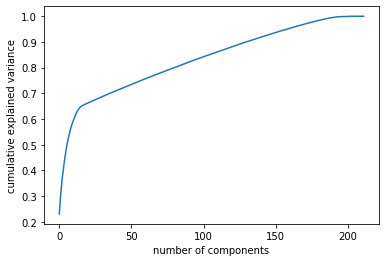

In [95]:
pca = PCA().fit(X_train1)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

## K-Neighbor Regressor

In [96]:
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.neighbors import KNeighborsRegressor

knn_param = {'n_neighbors': np.arange(1, 15, 1)}
              
knn_reg = KNeighborsRegressor()
knn_reg_grid = GridSearchCV(knn_reg, knn_param, cv=KFold(n_splits=10,
                                              shuffle=True, random_state=0))
knn_reg_grid.fit(X_trn1, y_train1)

GridSearchCV(cv=KFold(n_splits=10, random_state=0, shuffle=True),
             error_score=nan,
             estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30,
                                           metric='minkowski',
                                           metric_params=None, n_jobs=None,
                                           n_neighbors=5, p=2,
                                           weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [97]:
knn_reg_grid.best_estimator_

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                    weights='uniform')

In [98]:
knn_reg_grid.best_score_

0.9435331440351289

In [99]:
knn_reg_grid.best_params_

{'n_neighbors': 3}

## Using best parameters for KNN Regressor

In [100]:
knn_reg_test = KNeighborsRegressor(3)  

knn_reg_test.fit(X_trn1, y_train1)
knn_predict = knn_reg_test.predict(X_tst1)

error_knn = pd.DataFrame({
        'Actual Values': np.array(y_test1).flatten(),
        'Predicted Values': knn_predict.flatten()})
error_knn.head()

,Actual Values,Predicted Values
0,77.3,76.000000
1,66.6,65.133333
2,52.6,52.933333
3,61.5,61.866667
4,60.0,62.266667


In [101]:
mae_knn=mean_absolute_error(y_test1,knn_predict)
mse_knn=mean_squared_error(y_test1,knn_predict)
rmse_knn=sqrt(mean_squared_error(y_test1,knn_predict))

print('MAE: {:.4f}'.format(mae_knn))
print('MSE: {:.4f}'.format(mse_knn))
print('RMSE: {:.4f}'.format(rmse_knn))

MAE: 1.4956
MSE: 6.2775
RMSE: 2.5055


In [102]:
print('Train score: {:.4f}'.format(knn_reg_test.score(X_trn1, y_train1)))
print('Test score: {:.4f}'.format(knn_reg_test.score(X_tst1, y_test1)))

Train score: 0.9758
Test score: 0.9288


In [103]:
from sklearn.metrics import r2_score

r2_score(y_test1,knn_predict)

0.9287766534298978

## Linear Regression

In [104]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm_parameters = {'fit_intercept':[True,False], 'normalize':[True,False], 'copy_X':[True, False]}
lm_grid = GridSearchCV(lm,lm_parameters, cv=10,iid=True)
lm_grid.fit(X_trn1, y_train1)

C:\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


GridSearchCV(cv=10, error_score=nan,
             estimator=LinearRegression(copy_X=True, fit_intercept=True,
                                        n_jobs=None, normalize=False),
             iid=True, n_jobs=None,
             param_grid={'copy_X': [True, False],
                         'fit_intercept': [True, False],
                         'normalize': [True, False]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [105]:
lm_grid.best_estimator_

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [106]:
lm_grid.best_score_

0.9002987241946628

In [107]:
lm_grid.best_params_

{'copy_X': True, 'fit_intercept': True, 'normalize': False}

## Using best parameters for Linear Regression

In [108]:
from sklearn.linear_model import LinearRegression

lm_test = LinearRegression(copy_X= True, fit_intercept= True, normalize= False)
lm_test.fit(X_trn1,y_train1)
lm_predict = lm_test.predict(X_tst1)
error_lm = pd.DataFrame({
        'Actual Values': np.array(y_test1).flatten(),
        'Predicted Values': lm_predict.flatten()})
error_lm.head()

,Actual Values,Predicted Values
0,77.3,78.040345
1,66.6,65.742554
2,52.6,58.626714
3,61.5,60.697528
4,60.0,54.804247


In [109]:
mae_lm=mean_absolute_error(y_test1,lm_predict)
mse_lm=mean_squared_error(y_test1,lm_predict)
rmse_lm=sqrt(mean_squared_error(y_test1,lm_predict))

print('MAE: {:.4f}'.format(mae_lm))
print('MSE: {:.4f}'.format(mse_lm))
print('RMSE: {:.4f}'.format(rmse_lm))

MAE: 2.3888
MSE: 11.0216
RMSE: 3.3199


In [110]:
print('Train score: {:.4f}'.format(lm_test.score(X_trn1, y_train1)))
print('Test score: {:.4f}'.format(lm_test.score(X_tst1, y_test1)))

Train score: 0.9158
Test score: 0.8750


In [111]:
r2_score(y_test1,lm_predict)

0.8749514133235585

## Ridge Regression

In [112]:
from  sklearn.linear_model import Ridge

ridge = Ridge()
ridge_parameters = {'alpha':[0.01,0.1,1,10,100]}
ridge_grid = GridSearchCV(ridge, ridge_parameters,cv=10)
ridge_grid.fit(X_trn1, y_train1)

GridSearchCV(cv=10, error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [0.01, 0.1, 1, 10, 100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [113]:
ridge_grid.best_estimator_

Ridge(alpha=1, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=None, solver='auto', tol=0.001)

In [114]:
ridge_grid.best_score_

0.9011681639962376

In [115]:
ridge_grid.best_params_

{'alpha': 1}

## Using best parameter for Ridge Regression

In [116]:
ridge_test = Ridge(alpha=1)
ridge_test.fit(X_trn1,y_train1)
ridge_predict=ridge_test.predict(X_tst1)
error_ridge = pd.DataFrame({
        'Actual Values': np.array(y_test1).flatten(),
        'Predicted Values': ridge_predict.flatten()})
error_ridge.head()

,Actual Values,Predicted Values
0,77.3,78.026753
1,66.6,65.870296
2,52.6,57.969409
3,61.5,60.690643
4,60.0,54.754938


In [117]:
mae_ridge=mean_absolute_error(y_test1,ridge_predict)
mse_ridge=mean_squared_error(y_test1,ridge_predict)
rmse_ridge=sqrt(mean_squared_error(y_test1,ridge_predict))

print('MAE: {:.4f}'.format(mae_ridge))
print('MSE: {:.4f}'.format(mse_ridge))
print('RMSE: {:.4f}'.format(rmse_ridge))

MAE: 2.3701
MSE: 10.8185
RMSE: 3.2891


In [118]:
print('Train score: {:.4f}'.format(ridge_test.score(X_trn1, y_train1)))
print('Test score: {:.4f}'.format(ridge_test.score(X_tst1, y_test1)))

Train score: 0.9154
Test score: 0.8773


In [119]:
r2_score(y_test1,ridge_predict)

0.8772560919269028

## Lasso Regression

In [120]:
from sklearn.linear_model import Lasso

lasso = Lasso()
lasso_parameters = {'alpha':[0.01,0.1,1,10,100]}
lasso_grid = GridSearchCV(lasso, lasso_parameters,cv=10)
lasso_grid.fit(X_trn1, y_train1)

GridSearchCV(cv=10, error_score=nan,
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [0.01, 0.1, 1, 10, 100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [121]:
lasso_grid.best_estimator_

Lasso(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [122]:
lasso_grid.best_score_

0.8848511752364379

In [123]:
lasso_grid.best_params_

{'alpha': 0.01}

## Using best parameters for Lasso Regression

In [124]:
lasso_test = Lasso(alpha=0.01)
lasso_test.fit(X_trn1,y_train1)
lasso_predict=lasso_test.predict(X_tst1)
error_lasso = pd.DataFrame({
        'Actual Values': np.array(y_test1).flatten(),
        'Predicted Values': lasso_predict.flatten()})
error_lasso.head()

,Actual Values,Predicted Values
0,77.3,77.684534
1,66.6,65.960162
2,52.6,54.161803
3,61.5,60.720931
4,60.0,54.353669


In [125]:
mae_lasso=mean_absolute_error(y_test1,lasso_predict)
mse_lasso=mean_squared_error(y_test1,lasso_predict)
rmse_lasso=sqrt(mean_squared_error(y_test1,lasso_predict))

print('MAE: {:.4f}'.format(mae_lasso))
print('MSE: {:.4f}'.format(mse_lasso))
print('RMSE: {:.4f}'.format(rmse_lasso))

MAE: 2.4809
MSE: 11.2299
RMSE: 3.3511


In [126]:
print('Train score: {:.4f}'.format(lasso_test.score(X_trn1, y_train1)))
print('Test score: {:.4f}'.format(lasso_test.score(X_tst1, y_test1)))

Train score: 0.8959
Test score: 0.8726


In [127]:
r2_score(y_test1,lasso_predict)

0.8725879424690447

## Polynomial Regression

In [128]:
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from  sklearn.preprocessing  import PolynomialFeatures

def PolynomialRegression(degree=2, **kwargs):
    return make_pipeline(PolynomialFeatures(degree), LinearRegression(**kwargs))

param_grid = {'polynomialfeatures__degree': [1,2], 'linearregression__fit_intercept': [True, False], 'linearregression__normalize': [True, False]}

polyr_grid = GridSearchCV(PolynomialRegression(), param_grid, cv=10,iid=True)

polyr_grid.fit(X_trn1, y_train1)

C:\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


GridSearchCV(cv=10, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('polynomialfeatures',
                                        PolynomialFeatures(degree=2,
                                                           include_bias=True,
                                                           interaction_only=False,
                                                           order='C')),
                                       ('linearregression',
                                        LinearRegression(copy_X=True,
                                                         fit_intercept=True,
                                                         n_jobs=None,
                                                         normalize=False))],
                                verbose=False),
             iid=True, n_jobs=None,
             param_grid={'linearregression__fit_intercept': [True, False],
                         'linearregressio

In [129]:
polyr_grid.best_estimator_

Pipeline(memory=None,
         steps=[('polynomialfeatures',
                 PolynomialFeatures(degree=1, include_bias=True,
                                    interaction_only=False, order='C')),
                ('linearregression',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)

In [130]:
polyr_grid.best_score_

0.9003098693751613

In [131]:
polyr_grid.best_params_

{'linearregression__fit_intercept': True,
 'linearregression__normalize': False,
 'polynomialfeatures__degree': 1}

## Using best parameters for Polynomial Regression

In [132]:
polyr_test = PolynomialRegression(degree= 1)
polyr_test.fit(X_trn1,y_train1)
polyr_predict=polyr_test.predict(X_tst1)
error_polyr = pd.DataFrame({
        'Actual Values': np.array(y_test1).flatten(),
        'Predicted Values': polyr_predict.flatten()})
error_polyr.head()

,Actual Values,Predicted Values
0,77.3,78.054688
1,66.6,65.742188
2,52.6,58.632812
3,61.5,60.687500
4,60.0,54.812500


In [133]:
mae_polyr=mean_absolute_error(y_test1,polyr_predict)
mse_polyr=mean_squared_error(y_test1,polyr_predict)
rmse_polyr=sqrt(mean_squared_error(y_test1,polyr_predict))

print('MAE: {:.4f}'.format(mae_polyr))
print('MSE: {:.4f}'.format(mse_polyr))
print('RMSE: {:.4f}'.format(rmse_polyr))

MAE: 2.3893
MSE: 11.0222
RMSE: 3.3200


In [134]:
print('Train score: {:.4f}'.format(polyr_test.score(X_trn1, y_train1)))
print('Test score: {:.4f}'.format(polyr_test.score(X_tst1, y_test1)))

Train score: 0.9158
Test score: 0.8749


In [135]:
r2_score(y_test1,polyr_predict)

0.8749446127895457

## Linear SVR

In [136]:
from sklearn.svm import LinearSVR
from sklearn.exceptions import ConvergenceWarning
import warnings

lis = LinearSVR(random_state = 0)
lis_parameters = { 'C':[0.001,0.01,0.1,1,10,100], 'max_iter': np.logspace(3,4,3)}
lis_grid = GridSearchCV(lis, lis_parameters,cv=10,iid=True)
lis_grid.fit(X_trn1, y_train1)

warnings.filterwarnings(action='ignore',category=ConvergenceWarning)

C:\Anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Anaconda3\lib\site-packages\skle

In [137]:
lis_grid.best_estimator_

LinearSVR(C=1, dual=True, epsilon=0.0, fit_intercept=True,
          intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=1000.0,
          random_state=0, tol=0.0001, verbose=0)

In [138]:
lis_grid.best_score_

0.8925736166040044

In [139]:
lis_grid.best_params_

{'C': 1, 'max_iter': 1000.0}

## Using best parameter for Linear SVR

In [140]:
lis_test = LinearSVR(random_state = 0,C=1,max_iter=1000)
lis_test.fit(X_trn1,y_train1)
lis_predict=lis_test.predict(X_tst1)
error_lis = pd.DataFrame({
        'Actual Values': np.array(y_test1).flatten(),
        'Predicted Values': lis_predict.flatten()})
error_lis.head()

,Actual Values,Predicted Values
0,77.3,76.793815
1,66.6,65.383415
2,52.6,58.134665
3,61.5,59.455390
4,60.0,53.388675


In [141]:
mae_lis=mean_absolute_error(y_test1,lis_predict)
mse_lis=mean_squared_error(y_test1,lis_predict)
rmse_lis=sqrt(mean_squared_error(y_test1,lis_predict))

print('MAE: {:.4f}'.format(mae_lis))
print('MSE: {:.4f}'.format(mse_lis))
print('RMSE: {:.4f}'.format(rmse_lis))

MAE: 2.2752
MSE: 11.1264
RMSE: 3.3356


In [142]:
print('Train score: {:.4f}'.format(lis_test.score(X_trn1, y_train1)))
print('Test score: {:.4f}'.format(lis_test.score(X_tst1, y_test1)))

Train score: 0.9040
Test score: 0.8738


In [143]:
r2_score(y_test1,lis_predict)

0.8737626569812711

## SVM using Linear kernel

In [144]:
lsvm = SVR(kernel='linear')
lsvm_parameters = {'C':[0.01,0.1,1,10,100]}
lsvm_grid = GridSearchCV(lsvm, lsvm_parameters,cv=10)
lsvm_grid.fit(X_trn1, y_train1)

GridSearchCV(cv=10, error_score=nan,
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='scale', kernel='linear',
                           max_iter=-1, shrinking=True, tol=0.001,
                           verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.01, 0.1, 1, 10, 100]}, pre_dispatch='2*n_jobs',
             refit=True, return_train_score=False, scoring=None, verbose=0)

In [145]:
lsvm_grid.best_estimator_

SVR(C=1, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [146]:
lsvm_grid.best_score_

0.8922428440927861

In [147]:
lsvm_grid.best_params_

{'C': 1}

## Using best parameters for Linear kernel SVM

In [148]:
lsvm_test = SVR(kernel='linear',C=1)
lsvm_test.fit(X_trn1,y_train1)
lsvm_predict=lsvm_test.predict(X_tst1)
error_lsvm = pd.DataFrame({
        'Actual Values': np.array(y_test1).flatten(),
        'Predicted Values': lsvm_predict.flatten()})
error_lsvm.head()

,Actual Values,Predicted Values
0,77.3,76.785432
1,66.6,65.912730
2,52.6,58.038579
3,61.5,59.374790
4,60.0,53.250963


In [149]:
mae_lsvm=mean_absolute_error(y_test1,lsvm_predict)
mse_lsvm=mean_squared_error(y_test1,lsvm_predict)
rmse_lsvm=sqrt(mean_squared_error(y_test1,lsvm_predict))

print('MAE: {:.4f}'.format(mae_lsvm))
print('MSE: {:.4f}'.format(mse_lsvm))
print('RMSE: {:.4f}'.format(rmse_lsvm))

MAE: 2.2587
MSE: 10.9666
RMSE: 3.3116


In [150]:
print('Train score: {:.4f}'.format(lsvm_test.score(X_trn1, y_train1)))
print('Test score: {:.4f}'.format(lsvm_test.score(X_tst1, y_test1)))

Train score: 0.9039
Test score: 0.8756


In [151]:
r2_score(y_test1,lsvm_predict)

0.8755751017039699

## SVM using RBF kernel

In [152]:
rsvm = SVR(kernel='rbf')
rsvm_parameters = {'C':[0.01,0.1,1,10,100],'gamma':[0.01,0.1,1,10,100]}
rsvm_grid = GridSearchCV(rsvm, rsvm_parameters,cv=10)
rsvm_grid.fit(X_trn1, y_train1)

GridSearchCV(cv=10, error_score=nan,
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='scale', kernel='rbf',
                           max_iter=-1, shrinking=True, tol=0.001,
                           verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.01, 0.1, 1, 10, 100],
                         'gamma': [0.01, 0.1, 1, 10, 100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [153]:
rsvm_grid.best_estimator_

SVR(C=100, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.1,
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [154]:
rsvm_grid.best_score_

0.9616044794468177

In [155]:
rsvm_grid.best_params_

{'C': 100, 'gamma': 0.1}

## Using best parameters for RBF kernel SVM

In [156]:
rsvm_test = SVR(kernel='rbf',C=100,gamma=0.1)
rsvm_test.fit(X_trn1,y_train1)
rsvm_predict=rsvm_test.predict(X_tst1)
error_rsvm = pd.DataFrame({
        'Actual Values': np.array(y_test1).flatten(),
        'Predicted Values': rsvm_predict.flatten()})
error_rsvm.head()

,Actual Values,Predicted Values
0,77.3,77.218107
1,66.6,66.594313
2,52.6,52.997940
3,61.5,62.961762
4,60.0,60.770730


In [157]:
mae_rsvm=mean_absolute_error(y_test1,rsvm_predict)
mse_rsvm=mean_squared_error(y_test1,rsvm_predict)
rmse_rsvm=sqrt(mean_squared_error(y_test1,rsvm_predict))

print('MAE: {:.4f}'.format(mae_rsvm))
print('MSE: {:.4f}'.format(mse_rsvm))
print('RMSE: {:.4f}'.format(rmse_rsvm))

MAE: 1.1716
MSE: 4.0697
RMSE: 2.0174


In [158]:
print('Train score: {:.4f}'.format(rsvm_test.score(X_trn1, y_train1)))
print('Test score: {:.4f}'.format(rsvm_test.score(X_tst1, y_test1)))

Train score: 0.9774
Test score: 0.9538


In [159]:
r2_score(y_test1,rsvm_predict)

0.9538258975095628

## SVM using poly kernel

In [160]:
psvm = SVR(kernel='poly',gamma='scale')
psvm_parameters = {'C':[0.01,0.1,1,10,100],'degree':[2,3,4,5]}
psvm_grid = GridSearchCV(psvm, psvm_parameters,cv=10)
psvm_grid.fit(X_trn1, y_train1)

GridSearchCV(cv=10, error_score=nan,
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='scale', kernel='poly',
                           max_iter=-1, shrinking=True, tol=0.001,
                           verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.01, 0.1, 1, 10, 100], 'degree': [2, 3, 4, 5]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [161]:
psvm_grid.best_estimator_

SVR(C=10, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='poly', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [162]:
psvm_grid.best_score_

0.9429232594029007

In [163]:
psvm_grid.best_params_

{'C': 10, 'degree': 3}

## Using best parameters for poly kernel SVM

In [164]:
psvm_test = SVR(kernel='poly',gamma='scale',C=10, degree= 3)
psvm_test.fit(X_trn1,y_train1)
psvm_predict=psvm_test.predict(X_tst1)
error_psvm = pd.DataFrame({
        'Actual Values': np.array(y_test1).flatten(),
        'Predicted Values': psvm_predict.flatten()})
error_psvm.head()

,Actual Values,Predicted Values
0,77.3,77.447941
1,66.6,67.402244
2,52.6,52.944569
3,61.5,63.989828
4,60.0,62.132746


In [165]:
mae_psvm=mean_absolute_error(y_test1,psvm_predict)
mse_psvm=mean_squared_error(y_test1,psvm_predict)
rmse_psvm=sqrt(mean_squared_error(y_test1,psvm_predict))

print('MAE: {:.4f}'.format(mae_psvm))
print('MSE: {:.4f}'.format(mse_psvm))
print('RMSE: {:.4f}'.format(rmse_psvm))

MAE: 1.5250
MSE: 5.8104
RMSE: 2.4105


In [166]:
print('Train score: {:.4f}'.format(psvm_test.score(X_trn1, y_train1)))
print('Test score: {:.4f}'.format(psvm_test.score(X_tst1, y_test1)))

Train score: 0.9770
Test score: 0.9341


In [167]:
r2_score(y_test1,psvm_predict)

0.934076051781209

## Decision Tree Regressor

In [168]:
from sklearn.model_selection import learning_curve,GridSearchCV
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import StratifiedKFold
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor(criterion='mse',random_state=0)

dt_parameters = {'splitter': ['best', 'random'],
                  'max_depth': [1, 2, 3, 4, 5],
                  'max_features': [1, 2, 3, 4],
                  'min_samples_split':[5,10,15,20,25],
                  'min_samples_leaf':[2,3,4,5,6]}

dt_grid = GridSearchCV(dt,dt_parameters, cv=10)

dt_grid.fit(X_trn1, y_train1)

GridSearchCV(cv=10, error_score=nan,
             estimator=DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse',
                                             max_depth=None, max_features=None,
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             presort='deprecated',
                                             random_state=0, splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': [1, 2, 3, 4, 5],
                         'max_features': [1, 2, 3, 4],
                         'min_samples_leaf': [2, 3, 4, 5, 6],
                         'min_

In [169]:
dt_grid.best_estimator_

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=4,
                      max_features=4, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=6, min_samples_split=5,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=0, splitter='best')

In [170]:
dt_grid.best_score_

0.631698370200269

In [171]:
dt_grid.best_params_

{'max_depth': 4,
 'max_features': 4,
 'min_samples_leaf': 6,
 'min_samples_split': 5,
 'splitter': 'best'}

## Using best parameters for Decision tree Regressor

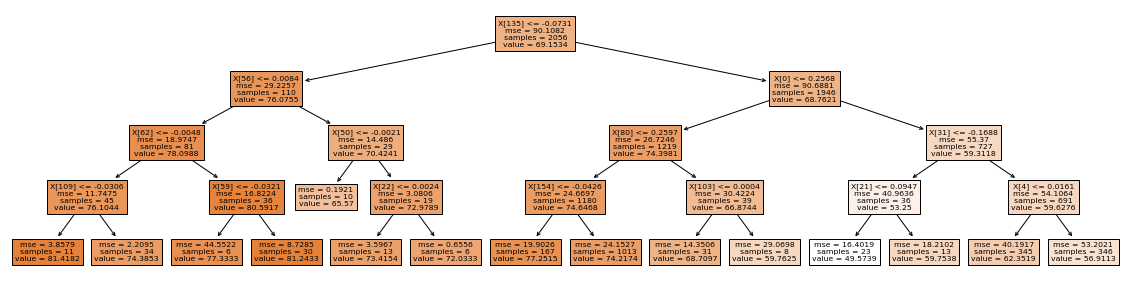

In [172]:
from sklearn import tree

dt_test = DecisionTreeRegressor(criterion='mse',max_depth= 4, max_features=4, splitter= 'best',min_samples_leaf= 6,min_samples_split= 5,random_state=0)
dt_test.fit(X_trn1,y_train1)

plt.figure(figsize = (20,5))
tree.plot_tree(dt_test,precision=4,filled=True)
plt.show()

In [173]:
dt_predict=dt_test.predict(X_tst1)
error_dt = pd.DataFrame({
        'Actual Values': np.array(y_test1).flatten(),
        'Predicted Values': dt_predict.flatten()})
error_dt.head()

,Actual Values,Predicted Values
0,77.3,74.217374
1,66.6,62.351884
2,52.6,56.911272
3,61.5,62.351884
4,60.0,56.911272


In [174]:
mae_dt=mean_absolute_error(y_test1,dt_predict)
mse_dt=mean_squared_error(y_test1,dt_predict)
rmse_dt=sqrt(mean_squared_error(y_test1,dt_predict))

print('MAE: {:.4f}'.format(mae_dt))
print('MSE: {:.4f}'.format(mse_dt))
print('RMSE: {:.4f}'.format(rmse_dt))

MAE: 4.4676
MSE: 35.6265
RMSE: 5.9688


In [175]:
print('Train score: {:.4f}'.format(dt_test.score(X_trn1, y_train1)))
print('Test score: {:.4f}'.format(dt_test.score(X_tst1, y_test1)))

Train score: 0.6650
Test score: 0.5958


In [176]:
r2_score(y_test1,dt_predict)

0.5957891519231252

## Does PCA give better results?

### Project1 results:

#### Using test scores:

1. 'knn'           : 0.9438, 
2. 'Linearreg'      : 0.7642, 
3. 'Ridge'          : 0.9508, 
4. 'Lasso'          : 0.9044, 
5. 'Polynomialreg'  : 0.1057, 
6. 'Linearsvr'      : 0.9436, 
7. 'linearkernel'   : 0.9446, 
8. 'rbfkernel'      : 0.9640, 
9. 'polykernel'     : 0.9617, 
10. 'decisiontreereg': 0.4821

#### Using mean square error:

1. 'knn'           : 4.9557, 
2. 'Linearreg'      : 20.7840, 
3. 'Ridge'          : 4.3347, 
4. Lasso'          : 8.4291, 
5. 'Polynomialreg'  : 78.8189, 
6. 'Linearsvr'      : 4.9731, 
7. 'linearkernel'   : 4.8832, 
8. 'rbfkernel'      : 3.1762, 
9. 'polykernel'     : 3.3793, 
10. 'decisiontreereg': 45.6476

#### Using root mean square error:

1. 'knn'           : 2.2261, 
2. 'Linearreg'      : 4.5590, 
3. 'Ridge'          : 2.0820, 
4. 'Lasso'          : 2.9033, 
5. 'Polynomialreg'  : 8.8780, 
6. 'Linearsvr'      : 2.2300, 
7. 'linearkernel'   : 2.2098, 
8. 'rbfkernel'      : 1.7822, 
9. 'polykernel'     : 1.8383, 
10. 'decisiontreereg': 6.7563

#### We observed that the best model in project1 is 'SVM using RBF kernel'

## Results after using PCA
### Using Test scores 

In [177]:
arr= {'knn': round(r2_score(y_test1,knn_predict),4), 
      'Linearreg': round(r2_score(y_test1,lm_predict),4), 
      'Ridge': round(r2_score(y_test1,ridge_predict),4), 
      'Lasso': round(r2_score(y_test1,lasso_predict),4), 
      'Polynomialreg': round(r2_score(y_test1,polyr_predict),4),
      'Linearsvr': round(r2_score(y_test1,lis_predict),4),
      'linearkernel': round(r2_score(y_test1,lsvm_predict),4),
      'rbfkernel': round(r2_score(y_test1,rsvm_predict),4),
      'polykernel': round(r2_score(y_test1,psvm_predict),4),
      'decisiontreereg': round(r2_score(y_test1,dt_predict),4)}

print(arr)

{'knn': 0.9288, 'Linearreg': 0.875, 'Ridge': 0.8773, 'Lasso': 0.8726, 'Polynomialreg': 0.8749, 'Linearsvr': 0.8738, 'linearkernel': 0.8756, 'rbfkernel': 0.9538, 'polykernel': 0.9341, 'decisiontreereg': 0.5958}


In [178]:
max_value = max(arr.values())  # maximum value
max_keys = [k for k, v in arr.items() if v == max_value] 

print('Best model : ', max_keys)
print('Best accuracy score : ', max(arr.values()))

Best model :  ['rbfkernel']
Best accuracy score :  0.9538


We select model with the highest accuracy score.

### Using mean square error

In [179]:
ms = { 'knn': round(mse_knn,4), 
               'Linearreg': round(mse_lm,4), 
               'Ridge': round(mse_ridge,4), 
               'Lasso': round(mse_lasso,4), 
               'Polynomialreg': round(mse_polyr,4),
               'Linearsvr': round(mse_lis,4), 
               'linearkernel': round(mse_lsvm,4),
               'rbfkernel': round(mse_rsvm,4),
               'polykernel': round(mse_psvm,4),
               'decisiontreereg': round(mse_dt,4)}
print(ms)

{'knn': 6.2775, 'Linearreg': 11.0216, 'Ridge': 10.8185, 'Lasso': 11.2299, 'Polynomialreg': 11.0222, 'Linearsvr': 11.1264, 'linearkernel': 10.9666, 'rbfkernel': 4.0697, 'polykernel': 5.8104, 'decisiontreereg': 35.6265}


In [180]:
min_val = min(ms.values())  # minimum value
min_key = [k for k, v in ms.items() if v == min_val] 

print('Best model : ', min_key)
print('Least mean square error : ', min(ms.values()))

Best model :  ['rbfkernel']
Least mean square error :  4.0697


We select the model with less mean square error value.

### Using root mean square error

In [181]:
rms = { 'knn': round(rmse_knn,4), 
               'Linearreg': round(rmse_lm,4), 
               'Ridge': round(rmse_ridge,4), 
               'Lasso': round(rmse_lasso,4), 
               'Polynomialreg': round(rmse_polyr,4),
               'Linearsvr': round(rmse_lis,4), 
               'linearkernel': round(rmse_lsvm,4),
               'rbfkernel': round(rmse_rsvm,4),
               'polykernel': round(rmse_psvm,4),
               'decisiontreereg': round(rmse_dt,4)}
print(rms)

{'knn': 2.5055, 'Linearreg': 3.3199, 'Ridge': 3.2891, 'Lasso': 3.3511, 'Polynomialreg': 3.32, 'Linearsvr': 3.3356, 'linearkernel': 3.3116, 'rbfkernel': 2.0174, 'polykernel': 2.4105, 'decisiontreereg': 5.9688}


In [182]:
min_value = min(rms.values())  # minimum value
min_keys = [k for k, v in rms.items() if v == min_value] 

print('Best model : ', min_keys)
print('Least root mean square error : ', min(rms.values()))

Best model :  ['rbfkernel']
Least root mean square error :  2.0174


We select the model with less root mean square error value.

In all the three above cases, we can clearly see that the best regressor for our dataset even after applying PCA on our dataset is : 'SVM using RBF kernel'.

On the application of PCA, computation became relatively faster.

#### On the application of PCA, the results of
1. Linear regression, Polynomial Regression and Decision Tree were improved.
2. While the rest were decreased.

## Deep Learning  models

## Applying Grid Search on Keras Regressor using 'sgd' optimizer

In [183]:
import numpy as np
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier,KerasRegressor

Using TensorFlow backend.


In [184]:
def create_model():
    #create model
    model = Sequential()
    model.add(Dense(20, input_dim=212, kernel_initializer='normal', activation='relu'))
    model.add(Dense(10, activation='relu'))
    model.add(Dense(1, kernel_initializer='normal'))
    #compile model
    model.compile(loss='mse', optimizer='sgd' , metrics = ['mse'])
    return model

In [185]:
seed = 10
np.random.seed(10)

In [186]:
model = KerasRegressor(build_fn = create_model, verbose = 0)

param_grid = {'batch_size':[10,20,30,40] , 'epochs':[10, 50, 100]}
grid_search = GridSearchCV(estimator= model, param_grid = param_grid, cv = 10)

In [187]:
grid_search_result = grid_search.fit(X_train1, y_train1)

In [188]:
grid_search_result.best_params_

{'batch_size': 20, 'epochs': 50}

## Using best parameters for Keras Regressor using 'sgd' optimizer

In [189]:
# create model
dn1 = Sequential()
dn1.add(Dense(20, input_dim=212, kernel_initializer='normal', activation='relu'))
dn1.add(Dense(10, activation='relu'))
dn1.add(Dense(1, kernel_initializer='normal'))

In [190]:
# Compile model
dn1.compile(loss='mse', optimizer='sgd' , metrics = ['mse'])

In [191]:
# Fit model
dn1.fit(X_train1, y_train1, epochs = 50, batch_size = 20)

Epoch 1/50
2056/2056 [==============================] - 0s 137us/step - loss: 4316.5240 - mse: 4316.5244
Epoch 2/50
2056/2056 [==============================] - 0s 83us/step - loss: 94.6244 - mse: 94.6244
Epoch 3/50
2056/2056 [==============================] - 0s 90us/step - loss: 99.1621 - mse: 99.1621
Epoch 4/50
2056/2056 [==============================] - 0s 111us/step - loss: 100.6800 - mse: 100.6800
Epoch 5/50
2056/2056 [==============================] - 0s 103us/step - loss: 100.6610 - mse: 100.6610
Epoch 6/50
2056/2056 [==============================] - 0s 82us/step - loss: 97.4448 - mse: 97.4448
Epoch 7/50
2056/2056 [==============================] - 0s 101us/step - loss: 98.4406 - mse: 98.4406
Epoch 8/50
2056/2056 [==============================] - 0s 105us/step - loss: 93.0801 - mse: 93.0801
Epoch 9/50
2056/2056 [==============================] - 0s 119us/step - loss: 95.5813 - mse: 95.5813
Epoch 10/50
2056/2056 [==============================] - 0s 117us/step - loss: 96.5333

In [192]:
# Evaluate model
dn1.evaluate(X_test1, y_test1)

882/882 [==============================] - 0s 57us/step


[88.65012786069424, 88.6501235961914]

In [193]:
y_predict_dn1 = dn1.predict(X_test1)
error_dn = pd.DataFrame({
        'Actual Values': np.array(y_test1).flatten(),
        'Predicted Values': y_predict_dn1.flatten()})
error_dn.head()

,Actual Values,Predicted Values
0,77.3,68.778236
1,66.6,68.778236
2,52.6,68.778236
3,61.5,68.778236
4,60.0,68.778236


In [194]:
mae_dn=mean_absolute_error(y_test1,y_predict_dn1)
mse_dn=mean_squared_error(y_test1,y_predict_dn1)
rmse_dn=sqrt(mean_squared_error(y_test1,y_predict_dn1))

print('MAE: {:.4f}'.format(mae_dn))
print('MSE: {:.4f}'.format(mse_dn))
print('RMSE: {:.4f}'.format(rmse_dn))

MAE: 7.8584
MSE: 88.6501
RMSE: 9.4154


## Applying Grid Search on Keras Regressor using 'adam' optimizer

In [195]:
def create_amodel():
    #create model
    amodel = Sequential()
    amodel.add(Dense(20, input_dim=212, kernel_initializer='normal', activation='relu'))
    amodel.add(Dense(10, activation='relu'))
    amodel.add(Dense(1, kernel_initializer='normal'))
    #compile model
    amodel.compile(loss='mse', optimizer='adam' , metrics = ['mse'])
    return amodel

In [196]:
seed = 10
np.random.seed(10)

In [197]:
amodel = KerasRegressor(build_fn = create_amodel, verbose = 0)

aparam_grid = {'batch_size':[10,20,30,40] , 'epochs':[10, 50, 100]}
agrid_search = GridSearchCV(estimator= amodel, param_grid = aparam_grid, cv = 10)

In [198]:
agrid_search = agrid_search.fit(X_train1, y_train1)

In [199]:
agrid_search.best_params_

{'batch_size': 10, 'epochs': 100}

## Using best parameters for Keras Regressor using 'adam' optimizer

In [200]:
# create model
dna = Sequential()
dna.add(Dense(20, input_dim=212, kernel_initializer='normal', activation='relu'))
dna.add(Dense(10, activation='relu'))
dna.add(Dense(1, kernel_initializer='normal'))

In [201]:
# Compile model
dna.compile(loss='mse', optimizer='adam' , metrics = ['mse'])

In [202]:
# Fit model
dna.fit(X_train1, y_train1, epochs = 100, batch_size = 10)

Epoch 1/100
2056/2056 [==============================] - 1s 260us/step - loss: 3574.3693 - mse: 3574.3699
Epoch 2/100
2056/2056 [==============================] - 0s 198us/step - loss: 203.9739 - mse: 203.9739
Epoch 3/100
2056/2056 [==============================] - 0s 223us/step - loss: 122.5839 - mse: 122.5840
Epoch 4/100
2056/2056 [==============================] - 0s 216us/step - loss: 92.5710 - mse: 92.5710
Epoch 5/100
2056/2056 [==============================] - 0s 206us/step - loss: 71.3909 - mse: 71.3909
Epoch 6/100
2056/2056 [==============================] - 0s 217us/step - loss: 55.9786 - mse: 55.9786
Epoch 7/100
2056/2056 [==============================] - 0s 228us/step - loss: 44.0064 - mse: 44.0064
Epoch 8/100
2056/2056 [==============================] - 0s 215us/step - loss: 34.7346 - mse: 34.7346
Epoch 9/100
2056/2056 [==============================] - 0s 219us/step - loss: 27.9094 - mse: 27.9095
Epoch 10/100
2056/2056 [==============================] - 0s 217us/step - 

In [203]:
# Evaluate model
dna.evaluate(X_test1, y_test1)

882/882 [==============================] - 0s 70us/step


[4.085461504740509, 4.085461616516113]

In [204]:
y_predict_dna = dna.predict(X_test1)
error_dna = pd.DataFrame({
        'Actual Values': np.array(y_test1).flatten(),
        'Predicted Values': y_predict_dna.flatten()})
error_dna.head()

,Actual Values,Predicted Values
0,77.3,78.913788
1,66.6,66.675156
2,52.6,57.525646
3,61.5,64.221054
4,60.0,62.530499


In [205]:
mae_dna=mean_absolute_error(y_test1,y_predict_dna)
mse_dna=mean_squared_error(y_test1,y_predict_dna)
rmse_dna=sqrt(mean_squared_error(y_test1,y_predict_dna))

print('MAE: {:.4f}'.format(mae_dna))
print('MSE: {:.4f}'.format(mse_dna))
print('RMSE: {:.4f}'.format(rmse_dna))

MAE: 1.3127
MSE: 4.0855
RMSE: 2.0213


## on PCA data

## Applying Grid Search on Keras Regressor using 'adam' optimizer

In [206]:
def create_amodel1():
    #create model
    amodel1 = Sequential()
    amodel1.add(Dense(20, input_dim=159, kernel_initializer='normal', activation='relu'))
    amodel1.add(Dense(10, activation='relu'))
    amodel1.add(Dense(1, kernel_initializer='normal'))
    #compile model
    amodel1.compile(loss='mse', optimizer='adam' , metrics = ['mse'])
    return amodel1

In [207]:
seed = 10
np.random.seed(10)

In [208]:
amodel1 = KerasRegressor(build_fn = create_amodel1, verbose = 0)

aparam_grid1 = {'batch_size':[10,20,30,40] , 'epochs':[10, 50, 100]}
agrid_search1 = GridSearchCV(estimator= amodel1, param_grid = aparam_grid1, cv = 10)

In [209]:
agrid_search1 = agrid_search1.fit(X_trn1, y_train1)

In [210]:
agrid_search1.best_params_

{'batch_size': 10, 'epochs': 100}

## Using best parameters for Keras Regressor using 'adam' optimizer

In [211]:
# create model
dna1 = Sequential()
dna1.add(Dense(20, input_dim=159, kernel_initializer='normal', activation='relu'))
dna1.add(Dense(10, activation='relu'))
dna1.add(Dense(1, kernel_initializer='normal'))

In [212]:
# Compile model
dna1.compile(loss='mse', optimizer='adam' , metrics = ['mse'])

In [213]:
# Fit model
dna1.fit(X_trn1, y_train1, epochs = 100, batch_size = 10)

Epoch 1/100
2056/2056 [==============================] - 1s 263us/step - loss: 4617.8271 - mse: 4617.8252
Epoch 2/100
2056/2056 [==============================] - 0s 223us/step - loss: 1852.3080 - mse: 1852.3082
Epoch 3/100
2056/2056 [==============================] - 0s 231us/step - loss: 84.6371 - mse: 84.6370
Epoch 4/100
2056/2056 [==============================] - 0s 228us/step - loss: 11.8157 - mse: 11.8157
Epoch 5/100
2056/2056 [==============================] - 0s 230us/step - loss: 9.1057 - mse: 9.1057
Epoch 6/100
2056/2056 [==============================] - 0s 225us/step - loss: 8.4460 - mse: 8.4460
Epoch 7/100
2056/2056 [==============================] - 0s 226us/step - loss: 8.1377 - mse: 8.1377
Epoch 8/100
2056/2056 [==============================] - 0s 224us/step - loss: 8.0309 - mse: 8.0309
Epoch 9/100
2056/2056 [==============================] - 0s 232us/step - loss: 7.9236 - mse: 7.9236
Epoch 10/100
2056/2056 [==============================] - 0s 228us/step - loss: 7.86

In [214]:
# Evaluate model
dna1.evaluate(X_tst1, y_test1)

882/882 [==============================] - 0s 64us/step


[6.8571409379003265, 6.857141971588135]

In [215]:
y_predict_dna1 = dna1.predict(X_tst1)
error_dna1 = pd.DataFrame({
        'Actual Values': np.array(y_test1).flatten(),
        'Predicted Values': y_predict_dna1.flatten()})
error_dna1.head()

,Actual Values,Predicted Values
0,77.3,77.908310
1,66.6,68.638428
2,52.6,56.218826
3,61.5,63.220207
4,60.0,61.343060


In [216]:
mae_dna1=mean_absolute_error(y_test1,y_predict_dna1)
mse_dna1=mean_squared_error(y_test1,y_predict_dna1)
rmse_dna1=sqrt(mean_squared_error(y_test1,y_predict_dna1))

print('MAE: {:.4f}'.format(mae_dna1))
print('MSE: {:.4f}'.format(mse_dna1))
print('RMSE: {:.4f}'.format(rmse_dna1))

MAE: 1.9009
MSE: 6.8571
RMSE: 2.6186


## On PCA data

## Applying Grid Search on Keras Regressor using 'sgd' optimizer

In [217]:
def create_samodel():
    #create model
    samodel = Sequential()
    samodel.add(Dense(20, input_dim=159, kernel_initializer='normal', activation='relu'))
    samodel.add(Dense(10, activation='relu'))
    samodel.add(Dense(1, kernel_initializer='normal'))
    #compile model
    samodel.compile(loss='mse', optimizer='sgd' , metrics = ['mse'])
    return samodel

In [218]:
seed = 10
np.random.seed(10)

In [219]:
samodel = KerasRegressor(build_fn = create_samodel, verbose = 0)

saparam_grid = {'batch_size':[10,20,30,40] , 'epochs':[10, 50, 100]}
sagrid_search = GridSearchCV(estimator= samodel, param_grid = saparam_grid, cv = 10)

In [220]:
sagrid_search = sagrid_search.fit(X_trn1, y_train1)

In [221]:
sagrid_search.best_params_

{'batch_size': 40, 'epochs': 100}

## Using best parameters for Keras Regressor using 'sgd' optimizer

In [222]:
# create model
dns = Sequential()
dns.add(Dense(20, input_dim=159, kernel_initializer='normal', activation='relu'))
dns.add(Dense(10, activation='relu'))
dns.add(Dense(1, kernel_initializer='normal'))

In [223]:
# Compile model
dns.compile(loss='mse', optimizer='sgd' , metrics = ['mse'])

In [224]:
# Fit model
dns.fit(X_trn1, y_train1, epochs = 100, batch_size = 40)

Epoch 1/100
2056/2056 [==============================] - 0s 67us/step - loss: 10602.8460 - mse: 10602.8477
Epoch 2/100
2056/2056 [==============================] - 0s 34us/step - loss: 511.3427 - mse: 511.3427
Epoch 3/100
2056/2056 [==============================] - 0s 41us/step - loss: 140.9908 - mse: 140.9909
Epoch 4/100
2056/2056 [==============================] - 0s 34us/step - loss: 96.1275 - mse: 96.1275
Epoch 5/100
2056/2056 [==============================] - 0s 41us/step - loss: 90.9886 - mse: 90.9886
Epoch 6/100
2056/2056 [==============================] - 0s 40us/step - loss: 90.2516 - mse: 90.2516
Epoch 7/100
2056/2056 [==============================] - 0s 37us/step - loss: 90.1450 - mse: 90.1450
Epoch 8/100
2056/2056 [==============================] - 0s 38us/step - loss: 90.1354 - mse: 90.1354
Epoch 9/100
2056/2056 [==============================] - 0s 63us/step - loss: 90.1440 - mse: 90.1440
Epoch 10/100
2056/2056 [==============================] - 0s 61us/step - loss: 90

In [225]:
# Evaluate model
dns.evaluate(X_tst1, y_test1)

882/882 [==============================] - 0s 70us/step


[88.1977467872118, 88.19774627685547]

In [226]:
y_predict_dns = dns.predict(X_tst1)
error_dns = pd.DataFrame({
        'Actual Values': np.array(y_test1).flatten(),
        'Predicted Values': y_predict_dns.flatten()})
error_dns.head()

,Actual Values,Predicted Values
0,77.3,69.250076
1,66.6,69.250076
2,52.6,69.250076
3,61.5,69.250076
4,60.0,69.250076


In [227]:
mae_dns=mean_absolute_error(y_test1,y_predict_dns)
mse_dns=mean_squared_error(y_test1,y_predict_dns)
rmse_dns=sqrt(mean_squared_error(y_test1,y_predict_dns))

print('MAE: {:.4f}'.format(mae_dns))
print('MSE: {:.4f}'.format(mse_dns))
print('RMSE: {:.4f}'.format(rmse_dns))

MAE: 7.7695
MSE: 88.1977
RMSE: 9.3914
